In [8]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd

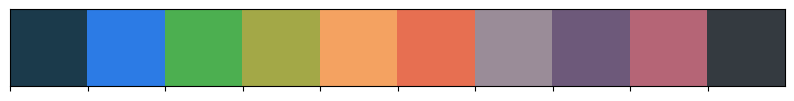

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

palette = [
    "#1B3A4B",  # Azul petróleo oscuro
    "#2C7BE5",  # Azul real
    "#4CAF50",  # Verde suave
    "#A3A847",  # Verde oliva
    "#F4A261",  # Naranja suave
    "#E76F51",  # Coral elegante
    "#9A8C98",  # Gris malva
    "#6D597A",  # Púrpura apagado
    "#B56576",  # Rosa vino
    "#343A40"   # Gris carbón
]

# Morado/Orange : Género 

sns.palplot(palette)
plt.show()

Lecutra data resultados

In [25]:
df_alumnes = pd.read_csv('data/data_aprobados_colegio_barrio_2022.csv',delimiter =";", encoding='latin-1')
df_alumnes.head()

,Curs,Estudi,Codi àrea territorial,Àrea territorial,Codi comarca,Comarca,Codi municipi,Municipi,Codi districte,Naturalesa,Titularitat,Nivell,Sexe,Concert,Resultat de l'avaluació,Alumnes avaluats
0,2021/2022,EDUCACIÓ SECUNDÀRIA OBLIGATÒRIA,108,CONSORCI D'EDUCACIÓ DE BARCELONA,13,BARCELONÈS,8019,BARCELONA,801901,PRIVAT,FUNDACIONS,1,DONA,SI,PROMOCIONEN SENSE PENDENTS,17
1,2021/2022,EDUCACIÓ SECUNDÀRIA OBLIGATÒRIA,108,CONSORCI D'EDUCACIÓ DE BARCELONA,13,BARCELONÈS,8019,BARCELONA,801901,PRIVAT,FUNDACIONS,1,HOME,SI,PROMOCIONEN AMB PENDENTS,5
2,2021/2022,EDUCACIÓ SECUNDÀRIA OBLIGATÒRIA,108,CONSORCI D'EDUCACIÓ DE BARCELONA,13,BARCELONÈS,8019,BARCELONA,801901,PRIVAT,FUNDACIONS,1,HOME,SI,PROMOCIONEN SENSE PENDENTS,38
3,2021/2022,EDUCACIÓ SECUNDÀRIA OBLIGATÒRIA,108,CONSORCI D'EDUCACIÓ DE BARCELONA,13,BARCELONÈS,8019,BARCELONA,801901,PRIVAT,FUNDACIONS,2,DONA,SI,NO PROMOCIONEN,1
4,2021/2022,EDUCACIÓ SECUNDÀRIA OBLIGATÒRIA,108,CONSORCI D'EDUCACIÓ DE BARCELONA,13,BARCELONÈS,8019,BARCELONA,801901,PRIVAT,FUNDACIONS,2,DONA,SI,PROMOCIONEN AMB PENDENTS,6


Filtrado solo Barcelona

In [26]:
df_alumnes_bcn = df_alumnes[df_alumnes['Municipi']=="BARCELONA"]
df_alumnes_bcn.head()

,Curs,Estudi,Codi àrea territorial,Àrea territorial,Codi comarca,Comarca,Codi municipi,Municipi,Codi districte,Naturalesa,Titularitat,Nivell,Sexe,Concert,Resultat de l'avaluació,Alumnes avaluats
0,2021/2022,EDUCACIÓ SECUNDÀRIA OBLIGATÒRIA,108,CONSORCI D'EDUCACIÓ DE BARCELONA,13,BARCELONÈS,8019,BARCELONA,801901,PRIVAT,FUNDACIONS,1,DONA,SI,PROMOCIONEN SENSE PENDENTS,17
1,2021/2022,EDUCACIÓ SECUNDÀRIA OBLIGATÒRIA,108,CONSORCI D'EDUCACIÓ DE BARCELONA,13,BARCELONÈS,8019,BARCELONA,801901,PRIVAT,FUNDACIONS,1,HOME,SI,PROMOCIONEN AMB PENDENTS,5
2,2021/2022,EDUCACIÓ SECUNDÀRIA OBLIGATÒRIA,108,CONSORCI D'EDUCACIÓ DE BARCELONA,13,BARCELONÈS,8019,BARCELONA,801901,PRIVAT,FUNDACIONS,1,HOME,SI,PROMOCIONEN SENSE PENDENTS,38
3,2021/2022,EDUCACIÓ SECUNDÀRIA OBLIGATÒRIA,108,CONSORCI D'EDUCACIÓ DE BARCELONA,13,BARCELONÈS,8019,BARCELONA,801901,PRIVAT,FUNDACIONS,2,DONA,SI,NO PROMOCIONEN,1
4,2021/2022,EDUCACIÓ SECUNDÀRIA OBLIGATÒRIA,108,CONSORCI D'EDUCACIÓ DE BARCELONA,13,BARCELONÈS,8019,BARCELONA,801901,PRIVAT,FUNDACIONS,2,DONA,SI,PROMOCIONEN AMB PENDENTS,6


Filtrado coles públicos y limpieza columnas importantes

In [27]:
df_alumnes_bcn_public = df_alumnes_bcn[df_alumnes_bcn["Naturalesa"]=="PÚBLIC"]
df_resultats_public = df_alumnes_bcn_public[["Sexe","Resultat de l'avaluació","Codi districte","Alumnes avaluats"]]
total_avaluats_public = df_resultats_public["Alumnes avaluats"].sum()
total_avaluats_public

22280

Distinción sin pendientes, con pendientes y que no pasan de curso

In [34]:
sense_pendentes = df_resultats_public[df_resultats_public["Resultat de l'avaluació"]=="PROMOCIONEN SENSE PENDENTS"]
amb_pendentes =  df_resultats_public[df_resultats_public["Resultat de l'avaluació"]=="PROMOCIONEN AMB PENDENTS"]
no_prom =  df_resultats_public[df_resultats_public["Resultat de l'avaluació"]=="NO PROMOCIONEN"]
sense_pendentes

,Sexe,Resultat de l'avaluació,Codi districte,Alumnes avaluats
42,DONA,PROMOCIONEN SENSE PENDENTS,801901,101
45,HOME,PROMOCIONEN SENSE PENDENTS,801901,95
48,DONA,PROMOCIONEN SENSE PENDENTS,801901,98
51,HOME,PROMOCIONEN SENSE PENDENTS,801901,78
54,DONA,PROMOCIONEN SENSE PENDENTS,801901,107
...,...,...,...,...
1174,HOME,PROMOCIONEN SENSE PENDENTS,801910,372
1177,DONA,PROMOCIONEN SENSE PENDENTS,801910,313
1180,HOME,PROMOCIONEN SENSE PENDENTS,801910,273
1183,DONA,PROMOCIONEN SENSE PENDENTS,801910,350


Distinción en género

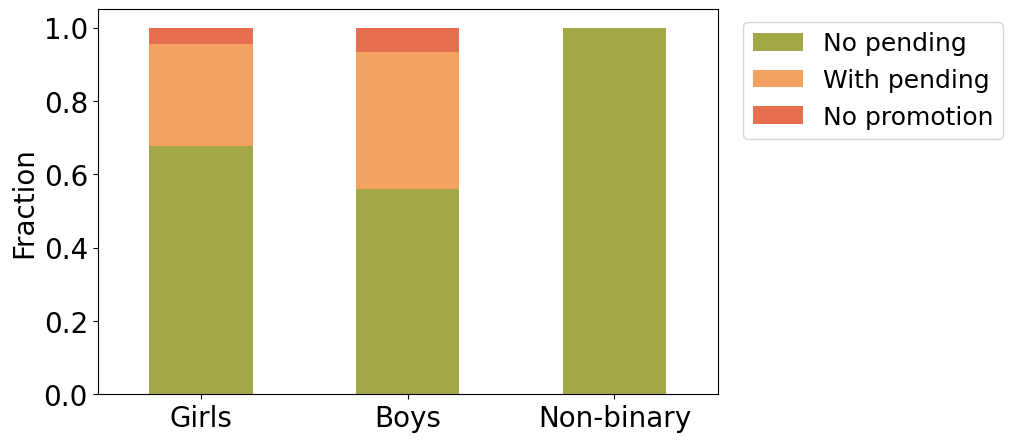

In [35]:
sense_pendentes = sense_pendentes.groupby("Sexe")["Alumnes avaluats"].sum()
amb_pendentes = amb_pendentes.groupby("Sexe")["Alumnes avaluats"].sum()
no_prom = no_prom.groupby("Sexe")["Alumnes avaluats"].sum()


# Crear un DataFrame combinando las tres Series
df_graf = pd.DataFrame({
    "Sense pendents": sense_pendentes,
    "Amb pendents": amb_pendentes,
    "No promocionen": no_prom
})


df_frac = df_graf.div(df_graf.sum(axis=1),axis=0)

df_frac = df_frac.rename(index={"DONA":"Girls","HOME":"Boys","NINF":"Non-binary"})
df_frac = df_frac.rename(columns={
    "Sense pendents": "No pending",
    "Amb pendents": "With pending",
    "No promocionen": "No promotion"
})
# Graficar barras apiladas
df_frac.plot(kind='bar', stacked=True, color=[palette[3], palette[4],palette[5]], figsize=(8,5))


plt.ylabel("Fraction",fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel("")
plt.xticks(rotation=0,fontsize=20)
plt.legend( bbox_to_anchor=(1.02,1),fontsize=18)
plt.savefig("figures_julia/barplot_sexe_resultat_public.svg",bbox_inches='tight',dpi=300)
plt.show()


In [16]:
df_sex = df_alumnes_bcn_public[["Sexe","Alumnes avaluats"]]
df_sex

,Sexe,Alumnes avaluats
41,DONA,42
42,DONA,101
43,HOME,4
44,HOME,68
45,HOME,95
...,...,...
1182,DONA,143
1183,DONA,350
1184,HOME,88
1185,HOME,167


In [ ]:
df_sex_sum = df_sex.groupby("Sexe")["Alumnes avaluats"].sum()
percent = df_sex_sum / df_sex_sum.sum()*100

# Diccionario de traducción
translate = {
    "HOME": "Boys",
    "DONA": "Girls",
    "NINF": "Not reported",

}

# Figura
plt.figure(figsize=(6,6))

colors = [palette[4], palette[7], palette[8]]  # Colores para cada categoría
wedges, texts, autotexts = plt.pie(
    x=percent.values,
    labels=None,            # sin etiquetas dentro
    autopct='%1.1f%%',
    startangle=90,
    colors = colors # usar solo los colores necesarios
)

# Leyenda
plt.legend(
    wedges,
    percent.index.map(translate),  # ¡Aquí aplico el diccionario!
    fontsize=13,
    loc="upper right",
    bbox_to_anchor=(1.3, 1)
)

# Estilo de los porcentajes
for autotext in autotexts:
    autotext.set_fontsize(15)
    autotext.set_color("black")

plt.title('% Pupils Depending on Sex', fontsize=18)
plt.axis('equal')

# ✅ EL ÚNICO SHOW
plt.show()


IndexError: list index out of range

<Figure size 600x600 with 0 Axes>

## NECESITIES ESPECIALS/ESPECÍFICS

In [139]:
df_alumnes_necessities = pd.read_csv('data_Julia/special_necesities_21_22.csv',delimiter =";")
df_alumnes_necessities.head()

,Curs,Estudis,Codi àrea territorial,Àrea territorial,Naturalesa,Titularitat,Matrícula concertada (S/N),Sexe,NESE agrupació,NESE descripció,Alumnes matriculats
0,2021/2022,EDUCACIÓ SECUNDÀRIA OBLIGATÒRIA,108,CONSORCI D'EDUCACIÓ DE BARCELONA,PRIVAT,PRIVAT,NO,DONA,NECESSITATS EDUCATIVES ESPECIALS,TRANSTORN GREU DE LA CONDUCTA,4
1,2021/2022,EDUCACIÓ SECUNDÀRIA OBLIGATÒRIA,108,CONSORCI D'EDUCACIÓ DE BARCELONA,PRIVAT,PRIVAT,NO,DONA,NECESSITATS EDUCATIVES ESPECIALS,TRASTORN MENTAL GREU,8
2,2021/2022,EDUCACIÓ SECUNDÀRIA OBLIGATÒRIA,108,CONSORCI D'EDUCACIÓ DE BARCELONA,PRIVAT,PRIVAT,NO,DONA,NECESSITATS EDUCATIVES ESPECIALS,TRASTORNS DE L'ESPECTRE AUTISTA,4
3,2021/2022,EDUCACIÓ SECUNDÀRIA OBLIGATÒRIA,108,CONSORCI D'EDUCACIÓ DE BARCELONA,PRIVAT,PRIVAT,NO,DONA,NECESSITATS EDUCATIVES ESPECIFIQUES,ALTES CAPACITATS,13
4,2021/2022,EDUCACIÓ SECUNDÀRIA OBLIGATÒRIA,108,CONSORCI D'EDUCACIÓ DE BARCELONA,PRIVAT,PRIVAT,NO,DONA,NECESSITATS EDUCATIVES ESPECIFIQUES,ALUMNAT NOUVINGUT,21


In [140]:
df_alumnes_necessities["NESE agrupació"].unique()

array(['NECESSITATS EDUCATIVES ESPECIALS',
       'NECESSITATS EDUCATIVES ESPECIFIQUES'], dtype=object)

In [141]:
df_alumnes_necessities_public = df_alumnes_necessities[df_alumnes_necessities["Naturalesa"]=="PÚBLIC"]
df_alumnes_necessities_public_sum = df_alumnes_necessities_public["Alumnes matriculats"].sum()
df_alumnes_necessities_public_sum

55264

In [142]:
df_alumnes_necessities_public.head()

,Curs,Estudis,Codi àrea territorial,Àrea territorial,Naturalesa,Titularitat,Matrícula concertada (S/N),Sexe,NESE agrupació,NESE descripció,Alumnes matriculats
54,2021/2022,EDUCACIÓ SECUNDÀRIA OBLIGATÒRIA,108,CONSORCI D'EDUCACIÓ DE BARCELONA,PÚBLIC,ALTRES TITULARITATS PÚBLIQUES,NaN,DONA,NECESSITATS EDUCATIVES ESPECIALS,DISCAPACITAT AUDITIVA LLEUGERA,1
55,2021/2022,EDUCACIÓ SECUNDÀRIA OBLIGATÒRIA,108,CONSORCI D'EDUCACIÓ DE BARCELONA,PÚBLIC,ALTRES TITULARITATS PÚBLIQUES,NaN,DONA,NECESSITATS EDUCATIVES ESPECIALS,DISCAPACITAT AUDITIVA MITJANA,1
56,2021/2022,EDUCACIÓ SECUNDÀRIA OBLIGATÒRIA,108,CONSORCI D'EDUCACIÓ DE BARCELONA,PÚBLIC,ALTRES TITULARITATS PÚBLIQUES,NaN,DONA,NECESSITATS EDUCATIVES ESPECIALS,DISCAPACITAT AUDITIVA PROFUNDA,3
57,2021/2022,EDUCACIÓ SECUNDÀRIA OBLIGATÒRIA,108,CONSORCI D'EDUCACIÓ DE BARCELONA,PÚBLIC,ALTRES TITULARITATS PÚBLIQUES,NaN,DONA,NECESSITATS EDUCATIVES ESPECIALS,DISCAPACITAT AUDITIVA SEVERA,1
58,2021/2022,EDUCACIÓ SECUNDÀRIA OBLIGATÒRIA,108,CONSORCI D'EDUCACIÓ DE BARCELONA,PÚBLIC,ALTRES TITULARITATS PÚBLIQUES,NaN,DONA,NECESSITATS EDUCATIVES ESPECIALS,DISCAPACITAT INTEL·LECTUAL LLEUGERA,4


NO TODOS LOS MATRICULADOS SE EVALUAN (ESPECIALMENTE EN ESTA CATEGORI)

In [143]:
df_alumnes_necessities_public =df_alumnes_necessities_public.drop(columns =["Curs","Estudis","Codi àrea territorial","Àrea territorial","Naturalesa","Titularitat","Matrícula concertada (S/N)"])
df_alumnes_necessities_public.head()

,Sexe,NESE agrupació,NESE descripció,Alumnes matriculats
54,DONA,NECESSITATS EDUCATIVES ESPECIALS,DISCAPACITAT AUDITIVA LLEUGERA,1
55,DONA,NECESSITATS EDUCATIVES ESPECIALS,DISCAPACITAT AUDITIVA MITJANA,1
56,DONA,NECESSITATS EDUCATIVES ESPECIALS,DISCAPACITAT AUDITIVA PROFUNDA,3
57,DONA,NECESSITATS EDUCATIVES ESPECIALS,DISCAPACITAT AUDITIVA SEVERA,1
58,DONA,NECESSITATS EDUCATIVES ESPECIALS,DISCAPACITAT INTEL·LECTUAL LLEUGERA,4


In [144]:
df_alumnes_necessities_public_girls = df_alumnes_necessities_public[df_alumnes_necessities_public["Sexe"]=="DONA"]
df_alumnes_necessities_public_boys = df_alumnes_necessities_public[df_alumnes_necessities_public["Sexe"]=="HOME"]
df_alumnes_necessities_public_ninf = df_alumnes_necessities_public[df_alumnes_necessities_public["Sexe"]=="NINF"]

In [188]:
import pandas as pd

# Leer el CSV
df_caract = pd.read_csv('data_Julia/nationality_special_necesities_21_22.csv', delimiter=';')

# Filtrar solo filas donde el municipi sea "BARCELONA"
# Usamos str.upper() por si hay diferencias de mayúsculas/minúsculas
df_caracteristics = df_caract[df_caract["Municipi"].str.upper() == "BARCELONA"].copy()
df_caracteristics = df_caracteristics[df_caracteristics["Naturalesa"]=="PÚBLIC"]

# Seleccionar solo las columnas relevantes para análisis
columnas_utiles = [
    'Naturalesa',
    'Titularitat',
    'Nivell',
    'Codi districte',
    'Matrícula concertada (S/N)',
    'Sexe',
    'Edat',
    'Zona nacionalitat (agrupació)',
    'Necessitats específiques de suport educatiu',
    'Alumnes matriculats'
]

df_caracteristics = df_caracteristics[columnas_utiles].copy()

# Revisar el resultado
df_caracteristics.head()

,Naturalesa,Titularitat,Nivell,Codi districte,Matrícula concertada (S/N),Sexe,Edat,Zona nacionalitat (agrupació),Necessitats específiques de suport educatiu,Alumnes matriculats
195,PÚBLIC,DEPARTAMENT D'EDUCACIÓ,1,801901,NaN,DONA,12,CENTRE I SUDAMÈRICA,NO,4
196,PÚBLIC,DEPARTAMENT D'EDUCACIÓ,1,801901,NaN,DONA,12,CENTRE I SUDAMÈRICA,SI,6
197,PÚBLIC,DEPARTAMENT D'EDUCACIÓ,1,801901,NaN,DONA,12,ESPANYA,NO,41
198,PÚBLIC,DEPARTAMENT D'EDUCACIÓ,1,801901,NaN,DONA,12,ESPANYA,SI,31
199,PÚBLIC,DEPARTAMENT D'EDUCACIÓ,1,801901,NaN,DONA,12,MAGREB,SI,2


In [189]:
import pandas as pd

# Leer el CSV
df_caract = pd.read_csv('data_Julia/nationality_special_necesities_21_22.csv', delimiter=';')

# Filtrar solo filas donde el municipi sea "BARCELONA"
# Usamos str.upper() por si hay diferencias de mayúsculas/minúsculas
df_caracteristics = df_caract[df_caract["Municipi"].str.upper() == "BARCELONA"].copy()
df_caracteristics = df_caracteristics[df_caracteristics["Naturalesa"]=="PÚBLIC"]

# Seleccionar solo las columnas relevantes para análisis
columnas_utiles = [
    'Naturalesa',
    'Titularitat',
    'Nivell',
    'Codi districte',
    'Matrícula concertada (S/N)',
    'Sexe',
    'Edat',
    'Zona nacionalitat (agrupació)',
    'Necessitats específiques de suport educatiu',
    'Alumnes matriculats'
]

df_caracteristics = df_caracteristics[columnas_utiles].copy()

# Revisar el resultado
df_caracteristics

,Naturalesa,Titularitat,Nivell,Codi districte,Matrícula concertada (S/N),Sexe,Edat,Zona nacionalitat (agrupació),Necessitats específiques de suport educatiu,Alumnes matriculats
195,PÚBLIC,DEPARTAMENT D'EDUCACIÓ,1,801901,NaN,DONA,12,CENTRE I SUDAMÈRICA,NO,4
196,PÚBLIC,DEPARTAMENT D'EDUCACIÓ,1,801901,NaN,DONA,12,CENTRE I SUDAMÈRICA,SI,6
197,PÚBLIC,DEPARTAMENT D'EDUCACIÓ,1,801901,NaN,DONA,12,ESPANYA,NO,41
198,PÚBLIC,DEPARTAMENT D'EDUCACIÓ,1,801901,NaN,DONA,12,ESPANYA,SI,31
199,PÚBLIC,DEPARTAMENT D'EDUCACIÓ,1,801901,NaN,DONA,12,MAGREB,SI,2
...,...,...,...,...,...,...,...,...,...,...
5250,PÚBLIC,DEPARTAMENT D'EDUCACIÓ,4,801910,NaN,HOME,17,CENTRE I SUDAMÈRICA,SI,1
5251,PÚBLIC,DEPARTAMENT D'EDUCACIÓ,4,801910,NaN,HOME,17,ESPANYA,NO,3
5252,PÚBLIC,DEPARTAMENT D'EDUCACIÓ,4,801910,NaN,HOME,17,ESPANYA,SI,6
5253,PÚBLIC,DEPARTAMENT D'EDUCACIÓ,4,801910,NaN,HOME,17,MAGREB,NO,1


In [190]:
df_caracteristics_girls = df_caracteristics[df_caracteristics["Sexe"]=="DONA"]
df_caracteristics_boys = df_caracteristics[df_caracteristics["Sexe"]=="HOME"]
df_caracteristics_ninf = df_caracteristics[df_caracteristics["Sexe"]=="NINF"]

df_caracteristics_girls = df_caracteristics_girls[df_caracteristics_girls["Necessitats específiques de suport educatiu"]=="SI"]
df_caracteristics_boys = df_caracteristics_boys[df_caracteristics_boys["Necessitats específiques de suport educatiu"]=="SI"]
df_caracteristics_ninf = df_caracteristics_ninf[df_caracteristics_ninf["Necessitats específiques de suport educatiu"]=="SI"]

tot_neces_girls = df_caracteristics_girls["Alumnes matriculats"].sum()
tot_neces_boys = df_caracteristics_boys["Alumnes matriculats"].sum()
tot_neces_ninf = df_caracteristics_ninf["Alumnes matriculats"].sum()    

print(tot_neces_girls,tot_neces_boys,tot_neces_ninf)

2893 3551 0


In [191]:
df_caracteristics_girls.head()

,Naturalesa,Titularitat,Nivell,Codi districte,Matrícula concertada (S/N),Sexe,Edat,Zona nacionalitat (agrupació),Necessitats específiques de suport educatiu,Alumnes matriculats
196,PÚBLIC,DEPARTAMENT D'EDUCACIÓ,1,801901,NaN,DONA,12,CENTRE I SUDAMÈRICA,SI,6
198,PÚBLIC,DEPARTAMENT D'EDUCACIÓ,1,801901,NaN,DONA,12,ESPANYA,SI,31
199,PÚBLIC,DEPARTAMENT D'EDUCACIÓ,1,801901,NaN,DONA,12,MAGREB,SI,2
202,PÚBLIC,DEPARTAMENT D'EDUCACIÓ,1,801901,NaN,DONA,12,RESTA UNIÓ EUROPEA,SI,3
204,PÚBLIC,DEPARTAMENT D'EDUCACIÓ,1,801901,NaN,DONA,12,ÀSIA I OCEANIA,SI,12


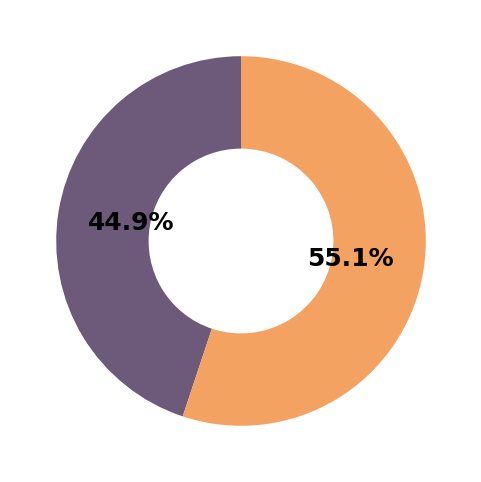

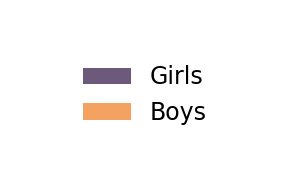

In [192]:
import matplotlib.pyplot as plt
import seaborn as sns


sizes = [tot_neces_girls, tot_neces_boys]
labels = ["Girls", "Boys"]

# Paleta tab20
colors = [palette[7], palette[4]]  # Colores para cada categoría

# Crear gráfico tipo donut
fig, ax = plt.subplots(figsize=(6,6))
wedges, texts, autotexts = ax.pie(
    sizes,
    labels=None,
    autopct='%1.1f%%',   # mostrar porcentaje
    startangle=90,
    colors=colors,
    wedgeprops=dict(width=0.5)  # efecto "donut"
)

# Mejorar apariencia de los textos
plt.setp(autotexts, size=18, weight="bold", color="black")
# plt.setp(texts, size=18, weight="bold") Title removed

# --- Leyenda en figura aparte ---
fig_leg, ax_leg = plt.subplots(figsize=(3,2))  # tamaño de la figura de la leyenda
ax_leg.legend(
    wedges,
    labels,
    loc="center",
    fontsize=17,
    frameon=False
)
ax_leg.axis('off')  # quitar ejes
fig_leg.tight_layout()

plt.savefig("figures_julia/donut_sexe_necesitats_public.svg",bbox_inches='tight',dpi=300)
plt.show()



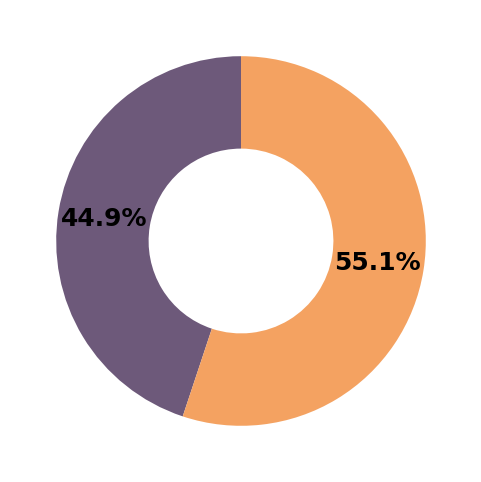

In [150]:
import matplotlib.pyplot as plt
import numpy as np

sizes = [tot_neces_girls, tot_neces_boys]
labels = ["Girls", "Boys"]
colors = [palette[7], palette[4]]
width = 0.5  # grosor del donut

fig, ax = plt.subplots(figsize=(6,6))

# Crear el donut
wedges, texts = ax.pie(
    sizes,
    labels=None,
    startangle=90,
    colors=colors,
    wedgeprops=dict(width=width)
)

# Colocar porcentajes centrados en el donut
total = sum(sizes)
for i, wedge in enumerate(wedges):
    ang = (wedge.theta2 + wedge.theta1)/2  # ángulo medio del sector
    x = np.cos(np.deg2rad(ang)) * (1 - width/2)  # posición radial centrada en el grosor
    y = np.sin(np.deg2rad(ang)) * (1 - width/2)
    ax.text(
        x, y,
        f"{sizes[i]/total*100:.1f}%",
        ha='center', va='center',
        fontsize=18,
        fontweight='bold',
        color='black'
    )

ax.set(aspect="equal")  # círculo perfecto

plt.savefig("figures_julia/donut_sexe_necesitats.svg", bbox_inches='tight', dpi=300)
plt.show()


Distinción tipos de necesidades

In [151]:
# Diccionario de traducción
translation_dict = {
    "SITUACIONS SOCIOECONÒMIQUES I/O SOCIOCULTURALS DESAFAVORIDES": "Disadvantaged socio-economic/cultural situation",
    "TRANSTORNS QUE CONDICIONEN L'APRENENTATGE": "Learning disorders",
    "ALUMNAT NOUVINGUT": "New students",
    "TRASTORNS DE L'ESPECTRE AUTISTA": "Autism spectrum disorders",
    "DISCAPACITAT INTEL·LECTUAL LLEUGERA": "Mild intellectual disability",
    "RETARD GREU DE L'APRENENTATGE": "Severe learning delay",
    "ALTES CAPACITATS": "High abilities",
    "TRANSTORN GREU DE LA CONDUCTA": "Severe behavioral disorder",
    "DISCAPACITAT INTEL·LECTUAL MODERADA": "Moderate intellectual disability",
    "RETARD DEL DESENVOLUPAMENT SENSE ETIOLOGIA CLARA": "Developmental delay unknown cause",
    "DISCAPACITAT MOTRIU AUTÒNOM": "Autonomous motor disability",
    "DISCAPACITAT VISUAL": "Visual disability",
    "DISCAPACITAT AUDITIVA MITJANA": "Moderate hearing disability",
    "TRASTORN MENTAL GREU": "Severe mental disorder",
    "DISCAPACITAT AUDITIVA LLEUGERA": "Mild hearing disability",
    "PLURIDISCAPACITAT": "Multiple disabilities",
    "DISCAPACITAT MOTRIU SEMIAUTÒNOM": "Semi-autonomous motor disability",
    "DISCAPACITAT AUDITIVA PROFUNDA": "Profound hearing disability",
    "DISCAPACITAT AUDITIVA SEVERA": "Severe hearing disability",
    "DISCAPACITAT MOTRIU DEPENENT": "Dependent motor disability",
    "DISCAPACITAT INTEL·LECTUAL SEVERA": "Severe intellectual disability",
    "DISCAPACITAT INTEL·LECTUAL PROFUNDA": "Profound intellectual disability"
}

df_alumnes_necessities_public["NESE"] = df_alumnes_necessities_public["NESE descripció"].map(translation_dict)
df_alumnes_necessities_public.head()


,Sexe,NESE agrupació,NESE descripció,Alumnes matriculats,NESE
54,DONA,NECESSITATS EDUCATIVES ESPECIALS,DISCAPACITAT AUDITIVA LLEUGERA,1,Mild hearing disability
55,DONA,NECESSITATS EDUCATIVES ESPECIALS,DISCAPACITAT AUDITIVA MITJANA,1,Moderate hearing disability
56,DONA,NECESSITATS EDUCATIVES ESPECIALS,DISCAPACITAT AUDITIVA PROFUNDA,3,Profound hearing disability
57,DONA,NECESSITATS EDUCATIVES ESPECIALS,DISCAPACITAT AUDITIVA SEVERA,1,Severe hearing disability
58,DONA,NECESSITATS EDUCATIVES ESPECIALS,DISCAPACITAT INTEL·LECTUAL LLEUGERA,4,Mild intellectual disability


In [152]:
# Trabajan lo mismo pero de otra forma

especifiques = [
    'ALTES CAPACITATS', 'ALUMNAT NOUVINGUT',
    "RETARD GREU DE L'APRENENTATGE",
    "TRANSTORNS QUE CONDICIONEN L'APRENENTATGE",
    'SITUACIONS SOCIOECONÒMIQUES I/O SOCIOCULTURALS DESAFAVORIDES'
]

## Requieren cambiar el CV del alumno
especials = [
    'TRANSTORN GREU DE LA CONDUCTA', 'TRASTORN MENTAL GREU',
    "TRASTORNS DE L'ESPECTRE AUTISTA",
    'DISCAPACITAT INTEL·LECTUAL LLEUGERA',
    'DISCAPACITAT AUDITIVA LLEUGERA', 'DISCAPACITAT AUDITIVA MITJANA',
    'DISCAPACITAT AUDITIVA PROFUNDA', 'DISCAPACITAT AUDITIVA SEVERA',
    'DISCAPACITAT INTEL·LECTUAL MODERADA',
    'DISCAPACITAT MOTRIU AUTÒNOM', 'DISCAPACITAT MOTRIU DEPENENT',
    'DISCAPACITAT MOTRIU SEMIAUTÒNOM', 'DISCAPACITAT VISUAL',
    'PLURIDISCAPACITAT',
    'RETARD DEL DESENVOLUPAMENT SENSE ETIOLOGIA CLARA',
    'DISCAPACITAT INTEL·LECTUAL SEVERA',
    'DISCAPACITAT INTEL·LECTUAL PROFUNDA'
]

educatives = [
    'ALTES CAPACITATS',
    'ALUMNAT NOUVINGUT',
    "RETARD GREU DE L'APRENENTATGE",
    "TRANSTORNS QUE CONDICIONEN L'APRENENTATGE",
    'SITUACIONS SOCIOECONÒMIQUES I/O SOCIOCULTURALS DESAFAVORIDES'
]

intel = [
    'DISCAPACITAT INTEL·LECTUAL LLEUGERA',
    'DISCAPACITAT INTEL·LECTUAL MODERADA',
    'DISCAPACITAT INTEL·LECTUAL SEVERA',
    'DISCAPACITAT INTEL·LECTUAL PROFUNDA',
    'RETARD DEL DESENVOLUPAMENT SENSE ETIOLOGIA CLARA'
]

mental = [
    'TRANSTORN GREU DE LA CONDUCTA',
    "TRASTORNS DE L'ESPECTRE AUTISTA",
    'TRASTORN MENTAL GREU'
]

fisics = [
    'DISCAPACITAT AUDITIVA LLEUGERA',
    'DISCAPACITAT AUDITIVA MITJANA',
    'DISCAPACITAT AUDITIVA SEVERA',
    'DISCAPACITAT AUDITIVA PROFUNDA',
    'DISCAPACITAT VISUAL',
    'DISCAPACITAT MOTRIU AUTÒNOM',
    'DISCAPACITAT MOTRIU SEMIAUTÒNOM',
    'DISCAPACITAT MOTRIU DEPENENT',
    'PLURIDISCAPACITAT'
]

# Traducir tus listas de categorías
especifiques_en = [translation_dict[x] for x in especifiques]
especials_en    = [translation_dict[x] for x in especials]
educatives_en   = [translation_dict[x] for x in educatives]
intel_en        = [translation_dict[x] for x in intel]
mental_en       = [translation_dict[x] for x in mental]
fisics_en       = [translation_dict[x] for x in fisics]


In [153]:
df_especifiques = df_alumnes_necessities_public[
    df_alumnes_necessities_public["NESE"].isin(especifiques_en)
]

df_especials = df_alumnes_necessities_public[
    df_alumnes_necessities_public["NESE"].isin(especials_en)
]

df_mental = df_alumnes_necessities_public[
    df_alumnes_necessities_public["NESE"].isin(mental_en)
]

df_educatives = df_alumnes_necessities_public[
    df_alumnes_necessities_public["NESE"].isin(educatives_en)
]

df_intel = df_alumnes_necessities_public[
    df_alumnes_necessities_public["NESE"].isin(intel_en)
]

df_fisics = df_alumnes_necessities_public[
    df_alumnes_necessities_public["NESE"].isin(fisics_en)
]
df_fisics

,Sexe,NESE agrupació,NESE descripció,Alumnes matriculats,NESE
54,DONA,NECESSITATS EDUCATIVES ESPECIALS,DISCAPACITAT AUDITIVA LLEUGERA,1,Mild hearing disability
55,DONA,NECESSITATS EDUCATIVES ESPECIALS,DISCAPACITAT AUDITIVA MITJANA,1,Moderate hearing disability
56,DONA,NECESSITATS EDUCATIVES ESPECIALS,DISCAPACITAT AUDITIVA PROFUNDA,3,Profound hearing disability
57,DONA,NECESSITATS EDUCATIVES ESPECIALS,DISCAPACITAT AUDITIVA SEVERA,1,Severe hearing disability
60,DONA,NECESSITATS EDUCATIVES ESPECIALS,DISCAPACITAT VISUAL,1,Visual disability
...,...,...,...,...,...
834,HOME,NECESSITATS EDUCATIVES ESPECIALS,DISCAPACITAT MOTRIU AUTÒNOM,15,Autonomous motor disability
835,HOME,NECESSITATS EDUCATIVES ESPECIALS,DISCAPACITAT MOTRIU DEPENENT,2,Dependent motor disability
836,HOME,NECESSITATS EDUCATIVES ESPECIALS,DISCAPACITAT MOTRIU SEMIAUTÒNOM,4,Semi-autonomous motor disability
837,HOME,NECESSITATS EDUCATIVES ESPECIALS,DISCAPACITAT VISUAL,4,Visual disability


In [154]:
df_mental_sum = df_mental["Alumnes matriculats"].sum()
df_intel_sum = df_intel["Alumnes matriculats"].sum()
df_fisics_sum = df_fisics["Alumnes matriculats"].sum()
df_educatives_sum = df_educatives["Alumnes matriculats"].sum()
print(df_mental_sum, df_intel_sum, df_fisics_sum, df_educatives_sum)


4044 3879 880 46461


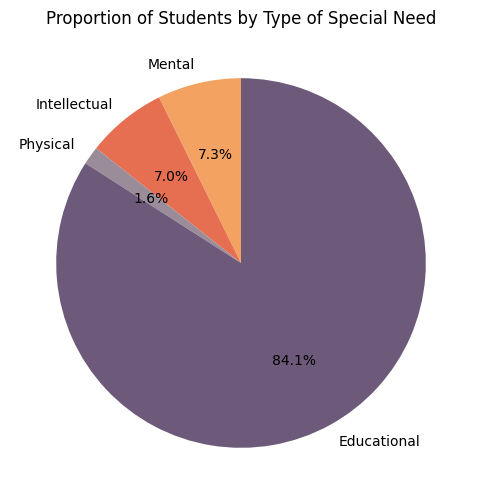

In [156]:
sizes = [df_mental_sum, df_intel_sum, df_fisics_sum, df_educatives_sum]
labels = ['Mental', 'Intellectual', 'Physical', 'Educational']

plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=[palette[4], palette[5], palette[6], palette[7]])
plt.title('Proportion of Students by Type of Special Need')
plt.savefig("figures_julia/donut_jerarquia_necesidades.png",dpi=400)
plt.show()


Gráfico desglosado con tipos de necesidades dentro de cada cateogría

In [157]:
conteo = df_alumnes_necessities_public.groupby("NESE")["Alumnes matriculats"].sum().sort_values(ascending=False)
conteo

NESE
Disadvantaged socio-economic/cultural situation    18254
Learning disorders                                 15856
New students                                        8206
Mild intellectual disability                        3191
Severe learning delay                               3149
Autism spectrum disorders                           2777
Severe behavioral disorder                          1154
High abilities                                       996
Moderate intellectual disability                     546
Autonomous motor disability                          172
Moderate hearing disability                          151
Visual disability                                    126
Developmental delay unknown cause                    115
Severe mental disorder                               113
Profound hearing disability                           90
Mild hearing disability                               77
Multiple disabilities                                 72
Severe hearing disability 

In [158]:
import pandas as pd
import plotly.express as px

# Tu conteo ya hecho
conteo = df_alumnes_necessities_public.groupby("NESE")["Alumnes matriculats"].sum().sort_values(ascending=False)

# Convertir a DataFrame
df_conteo = conteo.reset_index()
df_conteo.columns = ['NESE', 'Alumnes_matriculats']

# Crear mapeo de NESE a categorías
mapeo_categorias = {}

categorias = [
    ('EDUCATIVAS', educatives_en),
    ('INTELECTUAL', intel_en),
    ('MENTAL', mental_en),
    ('FÍSICAS', fisics_en)
]

for categoria, lista in categorias:
    for condicion in lista:
        mapeo_categorias[condicion] = categoria

# Aplicar el mapeo al DataFrame
df_conteo['Categoria'] = df_conteo['NESE'].map(mapeo_categorias)

# Verificar que no hay NESE sin categoría
if df_conteo['Categoria'].isnull().any():
    print("Advertencia: Hay NESE sin categoría asignada:")
    print(df_conteo[df_conteo['Categoria'].isnull()]['NESE'].tolist())

# Crear el treemap
fig = px.treemap(
    df_conteo,
    path=['Categoria', 'NESE'],
    values='Alumnes_matriculats',
    color='Categoria',
    color_discrete_map={
        'EDUCATIVAS': palette[6],  # Azul petróleo
        'INTELECTUAL': palette[7],  # Verde suave
        'MENTAL': palette[4],      # Coral elegante
        'FÍSICAS': palette[8]      # Naranja suave
    }
)

# Personalizar
fig.update_layout(
    margin=dict(t=50, l=25, r=25, b=25),
    font=dict(
    family="Arial, sans-serif",
    size=18,
    color="black"  # Texto negro
    ),
    title_font=dict(
    size=20,
    color="black",  # Título negro
    family="Arial, sans-serif"
    ),
)

# Personalizar los trazos - solo los títulos de categoría en negrita
fig.update_traces(
    textinfo="label+value+percent parent",
    texttemplate='<b>%{label}</b>' if '%{parent}' == '' else '%{label}<br>%{value} alumnos<br>%{percentParent:.1%}',
    hovertemplate='<b>%{label}</b><br>Alumnos: %{value}<br>Porcentaje: %{percentParent:.1%}<extra></extra>',
    marker=dict(
        line=dict(
            width=2,
            color='white'
        )
    ),
    textfont=dict(
        size=16,
        color='black',
        family="Arial, sans-serif"
    )
)

fig.show()
# Mostrar resumen
print("=== RESUMEN POR CATEGORÍA ===")
resumen = df_conteo.groupby('Categoria')['Alumnes_matriculats'].sum().sort_values(ascending=False)
for categoria, total in resumen.items():
    porcentaje = (total / df_conteo['Alumnes_matriculats'].sum()) * 100
    print(f"{categoria}: {total:,} alumnos ({porcentaje:.1f}%)")

print(f"\nTOTAL: {df_conteo['Alumnes_matriculats'].sum():,} alumnos")

=== RESUMEN POR CATEGORÍA ===
EDUCATIVAS: 46,461 alumnos (84.1%)
MENTAL: 4,044 alumnos (7.3%)
INTELECTUAL: 3,879 alumnos (7.0%)
FÍSICAS: 880 alumnos (1.6%)

TOTAL: 55,264 alumnos


In [193]:
# Treemap con texto personalizado
fig = px.treemap(
    df_conteo,
    path=['Categoria', 'NESE'],
    values='Alumnes_matriculats',
    title='Distribución de Necesidades Educativas',
    color='Categoria',
    color_discrete_map={
        'EDUCATIVAS': palette[6],  # Azul petróleo
        'INTELECTUAL': palette[7],  # Verde suave
        'MENTAL': palette[4],      # Coral elegante
        'FÍSICAS': palette[8]      # Naranja suave
    }
)

# Actualizar hover data
fig.update_traces(
    hovertemplate='<b>%{label}</b><br>Alumnos: %{value}<br>Porcentaje: %{percentParent:.1%}',
    textinfo='label+value+percent parent'
)

fig.show()

C:\Users\PC\AppData\Local\Temp\ipykernel_18036\1291155410.py:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


C:\Users\PC\AppData\Local\Temp\ipykernel_18036\1291155410.py:9: UserWarning:


The palette list has fewer values (10) than needed (22) and will cycle, which may produce an uninterpretable plot.



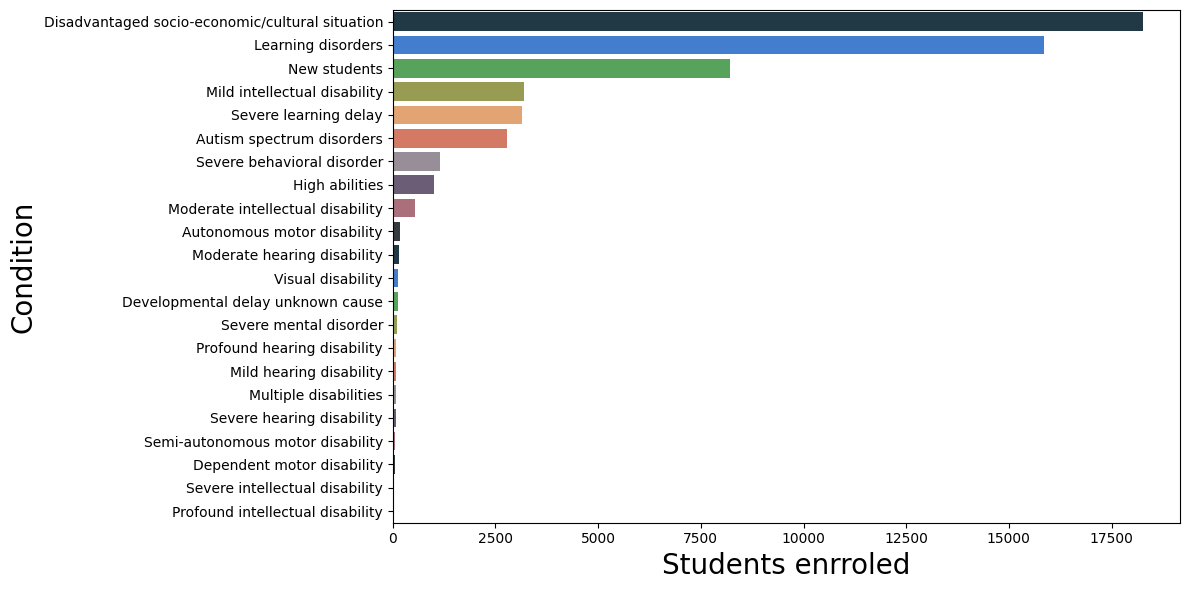

In [160]:
import seaborn as sns

# Convertimos a DataFrame para seaborn
df_plot = conteo.reset_index()
df_plot.columns = ["NESE", "Alumnes matriculats"]


plt.figure(figsize=(12,6))
sns.barplot(
    data=df_plot,
    y="NESE",
    x="Alumnes matriculats",
    palette=palette # <- aquí pasas la lista de colores
)

plt.xlabel("Students enrroled",fontsize=20)
plt.ylabel("Condition",fontsize=20)
plt.tight_layout()
plt.show()


In [161]:

df_girls_processed = df_alumnes_necessities_public_girls.groupby('NESE descripció')['Alumnes matriculats'].sum().reset_index()
df_girls_processed['NESE'] = df_girls_processed['NESE descripció'].map(translation_dict)
df_girls_processed = df_girls_processed[['NESE', 'Alumnes matriculats']]
df_girls_processed.columns = ['Condition', 'Girls']


df_boys_processed = df_alumnes_necessities_public_boys.groupby('NESE descripció')['Alumnes matriculats'].sum().reset_index()
df_boys_processed['NESE_english'] = df_boys_processed['NESE descripció'].map(translation_dict)
df_boys_processed = df_boys_processed[['NESE_english', 'Alumnes matriculats']]
df_boys_processed.columns = ['Condition', 'Boys']

df_combined_sex = pd.merge(df_girls_processed,df_boys_processed,on ='Condition',how='outer')

df_combined_sex

,Condition,Girls,Boys
0,High abilities,319,677
1,New students,3747,4459
2,Mild hearing disability,40,37
3,Moderate hearing disability,68,83
4,Profound hearing disability,45,45
5,Severe hearing disability,29,42
6,Mild intellectual disability,1249,1942
7,Moderate intellectual disability,232,314
8,Profound intellectual disability,1,3
9,Severe intellectual disability,12,11


Normalisation

In [162]:
df_combined_sex_norm = df_combined_sex.copy()

total_girls = df_combined_sex["Girls"].sum()
total_boys = df_combined_sex["Boys"].sum()

df_combined_sex_norm["prop_Girls"] = df_combined_sex_norm["Girls"]/total_girls
df_combined_sex_norm["prop_Boys"] = df_combined_sex_norm["Boys"]/total_boys
df_combined_sex_norm.head()

,Condition,Girls,Boys,prop_Girls,prop_Boys
0,High abilities,319,677,0.014321,0.020522
1,New students,3747,4459,0.168215,0.135166
2,Mild hearing disability,40,37,0.001796,0.001122
3,Moderate hearing disability,68,83,0.003053,0.002516
4,Profound hearing disability,45,45,0.002020,0.001364


In [163]:
real_conditions = df_combined_sex['Condition'].tolist()
real_conditions


['High abilities',
 'New students',
 'Mild hearing disability',
 'Moderate hearing disability',
 'Profound hearing disability',
 'Severe hearing disability',
 'Mild intellectual disability',
 'Moderate intellectual disability',
 'Profound intellectual disability',
 'Severe intellectual disability',
 'Autonomous motor disability',
 'Dependent motor disability',
 'Semi-autonomous motor disability',
 'Visual disability',
 'Multiple disabilities',
 'Developmental delay unknown cause',
 'Severe learning delay',
 'Disadvantaged socio-economic/cultural situation',
 'Severe behavioral disorder',
 'Learning disorders',
 'Severe mental disorder',
 'Autism spectrum disorders']

In [164]:
# ORDEN PERSONALIZADO
custom_order = [
    "Disadvantaged socio-economic/cultural situation",
    "Learning disorders",
    "New students",
    "Mild intellectual disability",
    "Severe learning delay",
    "Autism spectrum disorders",
    "Severe behavioral disorder",
    "High abilities",
    "Moderate intellectual disability",
    "Autonomous motor disability",
    "Moderate hearing disability",
    "Visual disability",
    "Developmental delay unknown cause",
    "Severe mental disorder",
    "Profound hearing disability",
    "Mild hearing disability",
    "Multiple disabilities",
    "Severe hearing disability",
    "Semi-autonomous motor disability",
    "Dependent motor disability",
    "Severe intellectual disability",
    "Profound intellectual disability"
]

# 1) Aplicar orden ANTES del melt
df_combined_sex['Condition'] = pd.Categorical(
    df_combined_sex['Condition'],
    categories=custom_order,
    ordered=True
)

# 2) Ordenar df original
df_combined_sex = df_combined_sex.sort_values('Condition')

# 3) Crear df_long
df_long = pd.melt(
    
    df_combined_sex,
    id_vars=['Condition'],
    value_vars=['Boys', 'Girls'],
    var_name='Gender',
    value_name='Students enrolled'
)

# 4) Convertir chicos a negativos
df_long['Students enrolled'] = np.where(
    df_long['Gender'] == 'Boys',
    -df_long['Students enrolled'],
    df_long['Students enrolled']
)

# 5) Ordenar Boys / Girls juntos
df_long['Gender'] = pd.Categorical(df_long['Gender'], ['Boys', 'Girls'], ordered=True)
df_long = df_long.sort_values(['Condition', 'Gender'])
df_long.head()


,Condition,Gender,Students enrolled
0,Disadvantaged socio-economic/cultural situation,Boys,-9902
22,Disadvantaged socio-economic/cultural situation,Girls,8352
1,Learning disorders,Boys,-9925
23,Learning disorders,Girls,5931
2,New students,Boys,-4459


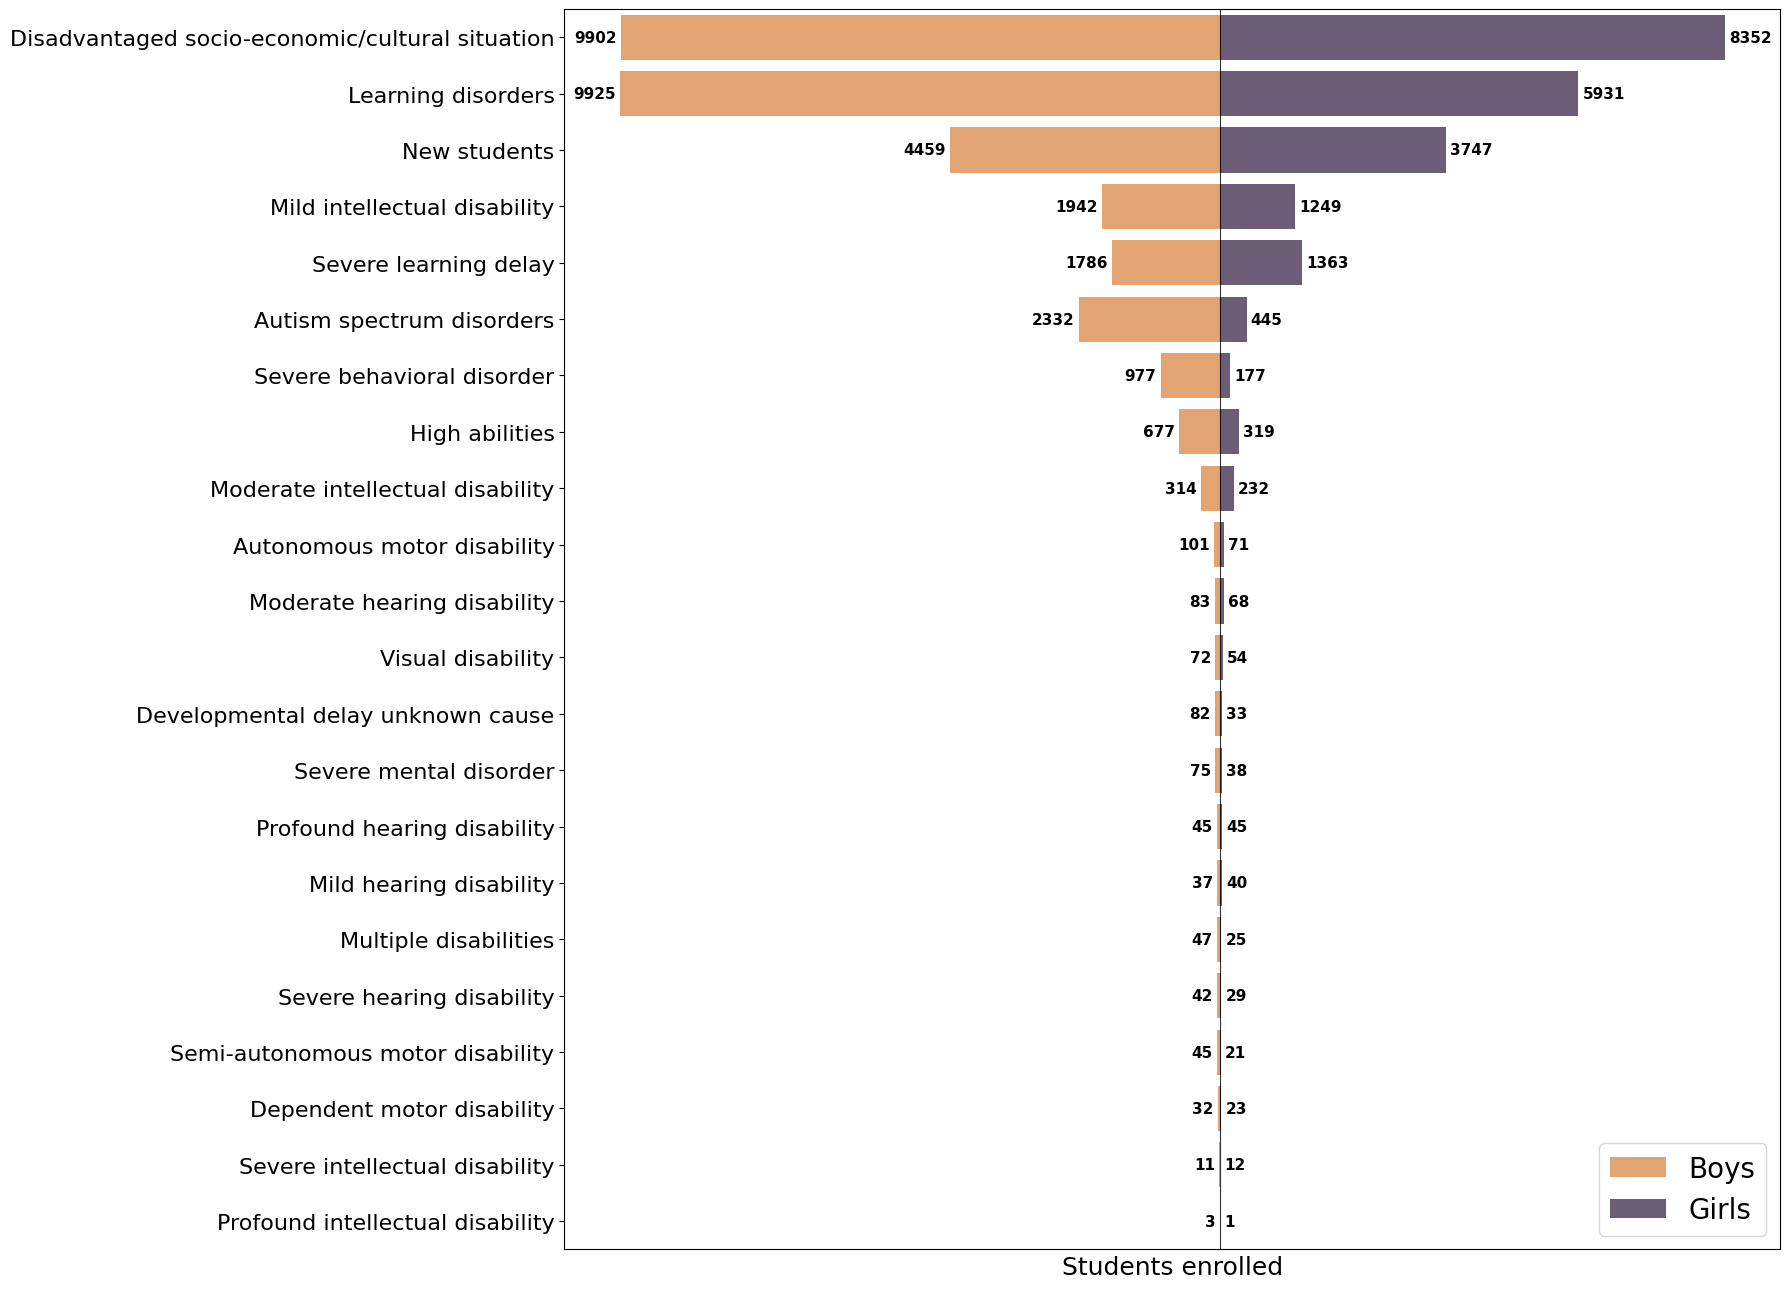

In [165]:
# Crear el gráfico
plt.figure(figsize=(18, 13))

# Paleta de colores
palette_dict = {
    'Boys': palette[4],
    'Girls':palette[7]
}

# Crear el barplot
barplot = sns.barplot(
    data=df_long,
    y='Condition',
    x='Students enrolled',
    hue='Gender',
    hue_order=['Boys', 'Girls'],   # Asegura Boys a la izquierda, Girls a la derecha
    dodge=False,                    # Asegura que salgan en la MISMA LÍNEA
    palette=palette_dict,
    orient='h'
)

# Personalizar eje X
#max_val = max(df_combined_sex['Boys'].max(), df_combined_sex['Girls'].max())
#xticks = np.arange(-max_val, max_val + 2000, 2500)
#xticklabels = [f"{abs(x):,}" for x in xticks]
plt.xlabel('Students enrolled', fontsize=18)
plt.xticks([])  # Quitar valores del eje X
plt.yticks(fontsize=16)
plt.ylabel("")

# Línea vertical 0
plt.axvline(x=0, color='black', linewidth=0.8, alpha=0.8)

# Leyenda
plt.legend(fontsize=20, loc='lower right')

# Etiquetas de valores en barras
for container in barplot.containers:
    barplot.bar_label(
        container,
        labels=[f"{abs(int(v.get_width()))}" for v in container],  # Valor absoluto
        padding=3,
        fontsize=11,
        fontweight='bold'
    )


plt.tight_layout()
plt.savefig("figures_julia/barplot_sexe_necesitats_public.png",bbox_inches='tight',dpi=300)
plt.show()


Same but normalizado

In [166]:
# ORDEN PERSONALIZADO
custom_order = [
    "Disadvantaged socio-economic/cultural situation",
    "Learning disorders",
    "New students",
    "Mild intellectual disability",
    "Severe learning delay",
    "Autism spectrum disorders",
    "Severe behavioral disorder",
    "High abilities",
    "Moderate intellectual disability",
    "Autonomous motor disability",
    "Moderate hearing disability",
    "Visual disability",
    "Developmental delay unknown cause",
    "Severe mental disorder",
    "Profound hearing disability",
    "Mild hearing disability",
    "Multiple disabilities",
    "Severe hearing disability",
    "Semi-autonomous motor disability",
    "Dependent motor disability",
    "Severe intellectual disability",
    "Profound intellectual disability"
]

# 1) Aplicar orden ANTES del melt
df_combined_sex_norm['Condition'] = pd.Categorical(
    df_combined_sex_norm['Condition'],
    categories=custom_order,
    ordered=True
)

# 2) Ordenar df original
df_combined_sex_norm = df_combined_sex_norm.sort_values('Condition')

# 3) Crear df_long
df_long = pd.melt(
    df_combined_sex_norm,
    id_vars=['Condition'],
    value_vars=['prop_Boys', 'prop_Girls'],
    var_name='Gender',
    value_name='Fraction'
)

# 4) Convertir chicos a negativos
df_long['Students enrolled'] = np.where(
    df_long['Gender'] == 'prop_Boys',
    -df_long['Fraction'],
    df_long['Fraction']
)

# 5) Ordenar Boys / Girls juntos
df_long['Gender'] = pd.Categorical(df_long['Gender'], ['prop_Boys', 'prop_Girls'], ordered=True)
df_long = df_long.sort_values(['Condition', 'Gender'])
df_long


,Condition,Gender,Fraction,Students enrolled
0,Disadvantaged socio-economic/cultural situation,prop_Boys,0.300161,-0.300161
22,Disadvantaged socio-economic/cultural situation,prop_Girls,0.374949,0.374949
1,Learning disorders,prop_Boys,0.300858,-0.300858
23,Learning disorders,prop_Girls,0.266263,0.266263
2,New students,prop_Boys,0.135166,-0.135166
24,New students,prop_Girls,0.168215,0.168215
3,Mild intellectual disability,prop_Boys,0.058868,-0.058868
25,Mild intellectual disability,prop_Girls,0.056072,0.056072
4,Severe learning delay,prop_Boys,0.054139,-0.054139
26,Severe learning delay,prop_Girls,0.061190,0.061190


In [167]:
import pandas as pd
import numpy as np

# Lista de condiciones que quieres agrupar como "Otras"
otras_conditions = [
    "Autonomous motor disability",
    "Moderate hearing disability",
    "Visual disability",
    "Developmental delay unknown cause",
    "Severe mental disorder",
    "Profound hearing disability",
    "Mild hearing disability",
    "Multiple disabilities",
    "Severe hearing disability",
    "Semi-autonomous motor disability",
    "Dependent motor disability",
    "Severe intellectual disability",
    "Profound intellectual disability"
]

# 1) Crear nueva columna donde se reemplazan estas condiciones por "Otras"
df_combined_sex_norm['Condition_grouped'] = df_combined_sex_norm['Condition'].apply(
    lambda x: 'Others' if x in otras_conditions else x
)

# 2) Definir nuevo orden personalizado, reemplazando las condiciones agrupadas por "Otras"
custom_order_grouped = [
    "Disadvantaged socio-economic/cultural situation",
    "Learning disorders",
    "New students",
    "Mild intellectual disability",
    "Severe learning delay",
    "Autism spectrum disorders",
    "Severe behavioral disorder",
    "High abilities",
    "Moderate intellectual disability",
    "Others"
]

# 3) Convertir a categoría y ordenar
df_combined_sex_norm['Condition_grouped'] = pd.Categorical(
    df_combined_sex_norm['Condition_grouped'],
    categories=custom_order_grouped,
    ordered=True
)

df_combined_sex_norm = df_combined_sex_norm.sort_values('Condition_grouped')

# 4) Melt para pasar a formato largo
df_long = pd.melt(
    df_combined_sex_norm,
    id_vars=['Condition_grouped'],
    value_vars=['prop_Boys', 'prop_Girls'],
    var_name='Gender',
    value_name='Fraction'
)

# 4) Convertir chicos a negativos
df_long['Students enrolled'] = np.where(
    df_long['Gender'] == 'prop_Boys',
    -df_long['Fraction'],
    df_long['Fraction']
)


# Diccionario de nombres cortos
short_names = {
    "Disadvantaged socio-economic/cultural situation": "Socio-economic/Cultural",
    "Learning disorders": "Learning disorders",
    "New students": "New Students",
    "Mild intellectual disability": "Mild ID",
    "Severe learning delay": "Severe learning",
    "Autism spectrum disorders": "Autism",
    "Severe behavioral disorder": "Severe behavior",
    "High abilities": "High abilities",
    "Moderate intellectual disability": "Moderate ID",
    "Others": "Others"
}

# Aplicar el mapeo
df_long['Condition_grouped_short'] = df_long['Condition_grouped'].map(short_names)


# 6) Ordenar Boys / Girls juntos
df_long['Gender'] = pd.Categorical(df_long['Gender'], ['prop_Boys', 'prop_Girls'], ordered=True)
df_long = df_long.sort_values(['Condition_grouped', 'Gender'])

df_long.head()

,Condition_grouped,Gender,Fraction,Students enrolled,Condition_grouped_short
0,Disadvantaged socio-economic/cultural situation,prop_Boys,0.300161,-0.300161,Socio-economic/Cultural
22,Disadvantaged socio-economic/cultural situation,prop_Girls,0.374949,0.374949,Socio-economic/Cultural
1,Learning disorders,prop_Boys,0.300858,-0.300858,Learning disorders
23,Learning disorders,prop_Girls,0.266263,0.266263,Learning disorders
2,New students,prop_Boys,0.135166,-0.135166,New Students


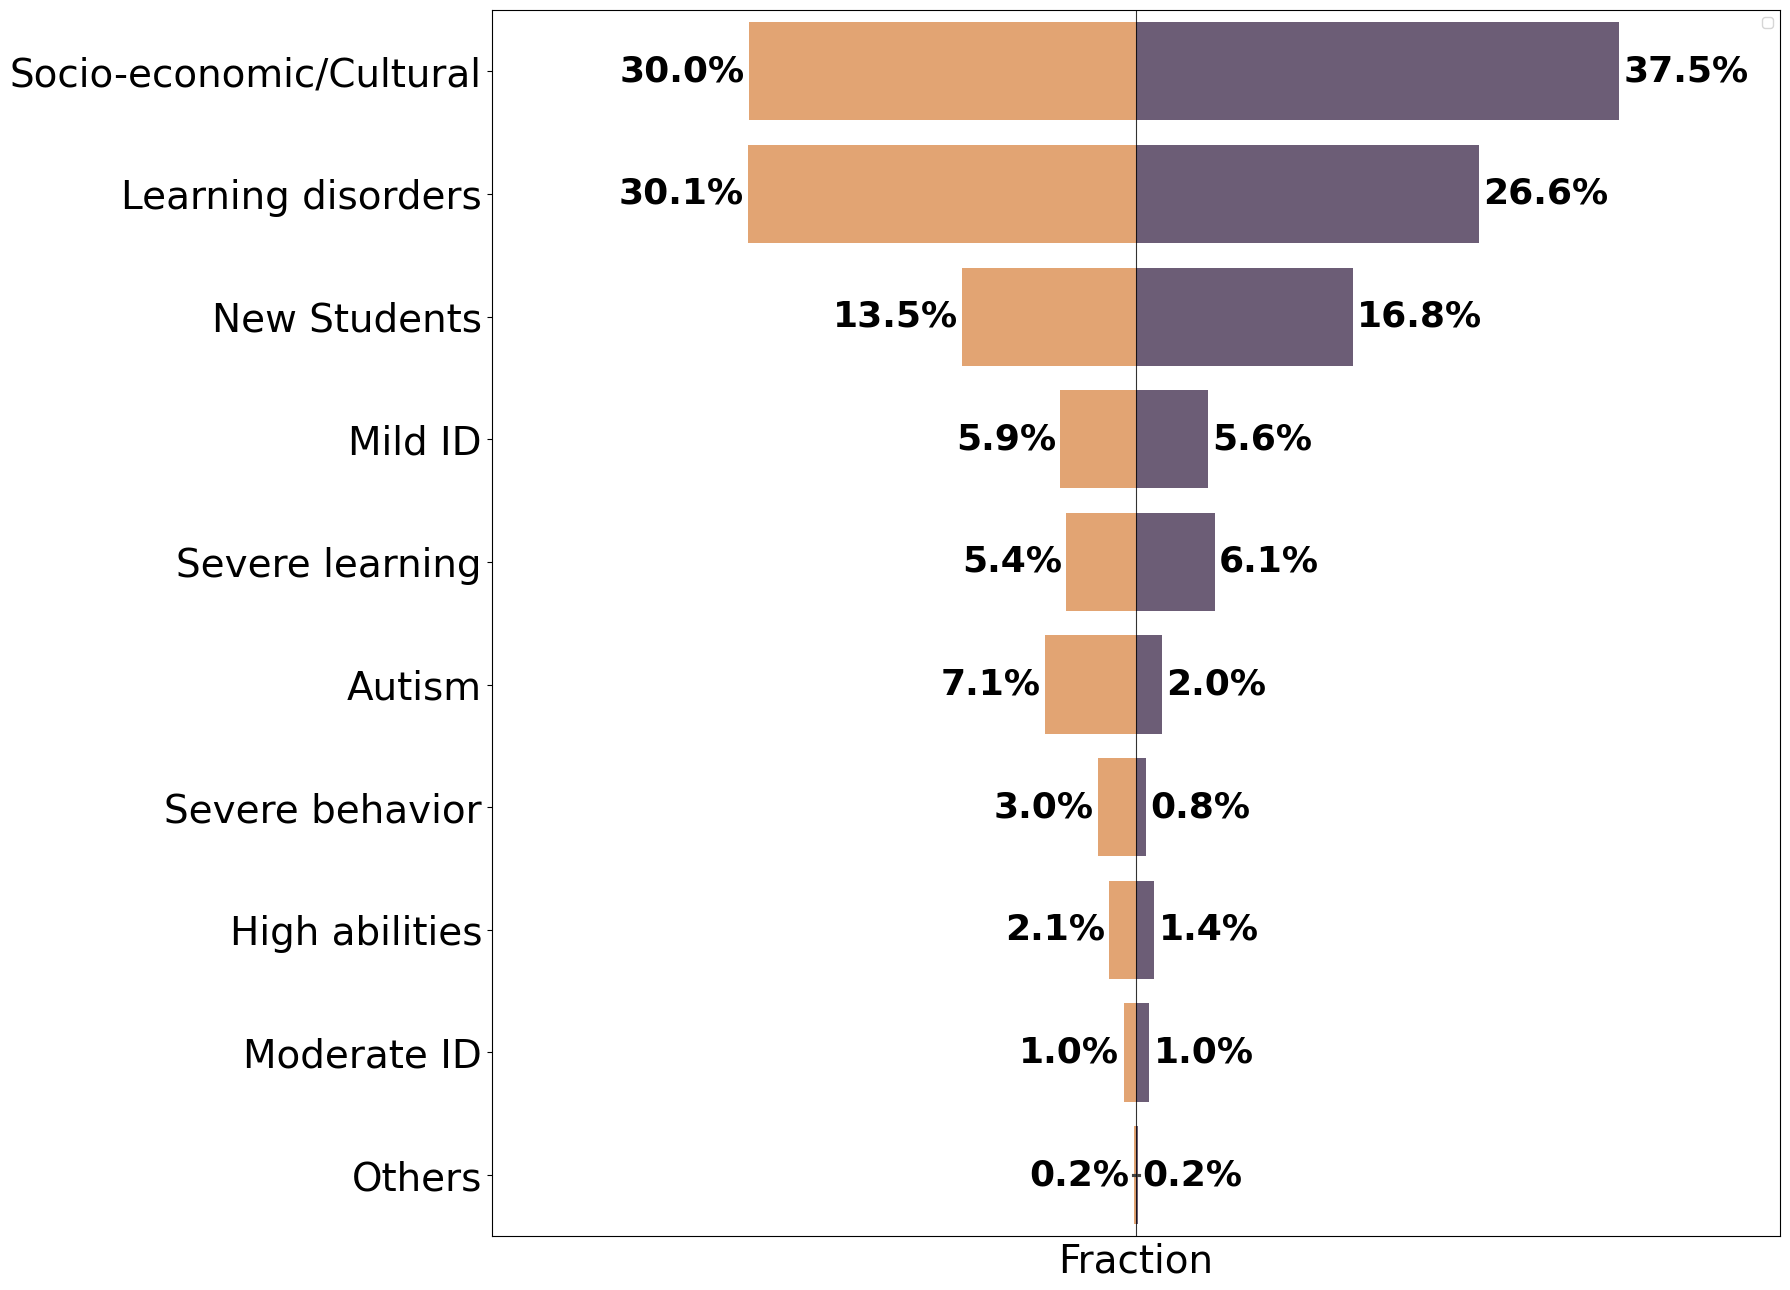

In [168]:
# Crear el gráfico
plt.figure(figsize=(18, 13))

# Paleta de colores
palette_dict = {
    'prop_Boys': palette[4],
    'prop_Girls':palette[7]
}

# Crear el barplot
barplot = sns.barplot(
    data=df_long,
    y='Condition_grouped_short',
    x='Students enrolled',
    hue='Gender',
    hue_order=['prop_Boys', 'prop_Girls'],   # Asegura Boys a la izquierda, Girls a la derecha
    dodge=False,                    # Asegura que salgan en la MISMA LÍNEA
    palette=palette_dict,
    orient='h'
)

# Personalizar eje X
#max_val = max(df_combined_sex['Boys'].max(), df_combined_sex['Girls'].max())
#xticks = np.arange(-max_val, max_val + 2000, 2500)
#xticklabels = [f"{abs(x):,}" for x in xticks]
plt.xlim(-0.5,0.5)
plt.xlabel('Fraction', fontsize=28)
plt.xticks([])  # Quitar valores del eje X
plt.yticks(fontsize=28)
plt.ylabel("")
plt.legend("")
# Línea vertical 0
plt.axvline(x=0, color='black', linewidth=0.8, alpha=0.8)

# Etiquetas de valores en barras
for container in barplot.containers:
    barplot.bar_label(
        container,
        labels=[f"{abs(v.get_width())*100:.1f}%" for v in container],  # Valor absoluto
        padding=3,
        fontsize=26,
        fontweight='bold'
    )


plt.tight_layout()
plt.savefig("figures_julia/barplot_sexe_necesitats_public.svg",bbox_inches='tight',dpi=300)
plt.show()


Distribucion necesidades por género incluido

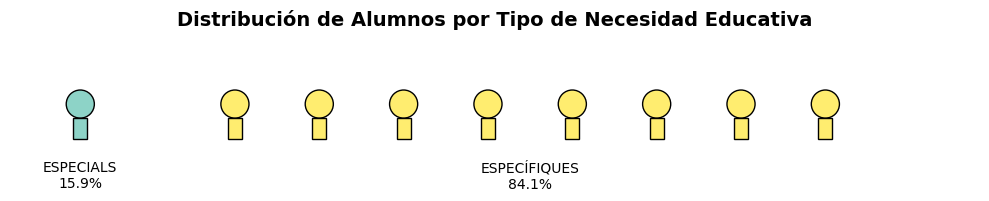

In [169]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import numpy as np

def crear_grafico_monigotes_matplotlib(datos, titulo):
    fig, ax = plt.subplots(figsize=(10, 6))
    
    total = sum(datos.values())
    colores = plt.cm.Set3(np.linspace(0, 1, len(datos)))
    
    x_pos = 0
    for (categoria, valor), color in zip(datos.items(), colores):
        porcentaje = (valor / total) * 100
        num_monigotes = max(1, int(porcentaje / 10))  # 1 monigote por cada 10%
        
        # Dibujar monigotes simples
        for i in range(num_monigotes):
            # Cabeza
            cabeza = patches.Circle((x_pos + i * 1.2, 0), 0.2, 
                                  facecolor=color, edgecolor='black')
            # Cuerpo
            cuerpo = patches.Rectangle((x_pos + i * 1.2 - 0.1, -0.5), 0.2, 0.3,
                                     facecolor=color, edgecolor='black')
            ax.add_patch(cabeza)
            ax.add_patch(cuerpo)
        
        # Añadir etiqueta
        ax.text(x_pos + (num_monigotes - 1) * 0.6, -0.8, 
               f'{categoria}\n{porcentaje:.1f}%', 
               ha='center', va='top', fontsize=10)
        
        x_pos += num_monigotes * 1.2 + 1
    
    ax.set_xlim(-1, x_pos)
    ax.set_ylim(-1, 1)
    ax.set_title(titulo, fontsize=14, fontweight='bold')
    ax.set_aspect('equal')
    ax.axis('off')
    
    plt.tight_layout()
    return fig

# Gráfico principal
datos_principal = {
    'ESPECIALS': df_especials['Alumnes matriculats'].sum(),
    'ESPECÍFIQUES': df_especifiques['Alumnes matriculats'].sum()
}

fig1 = crear_grafico_monigotes_matplotlib(datos_principal, 
                                        'Distribución de Alumnos por Tipo de Necesidad Educativa')
plt.show()


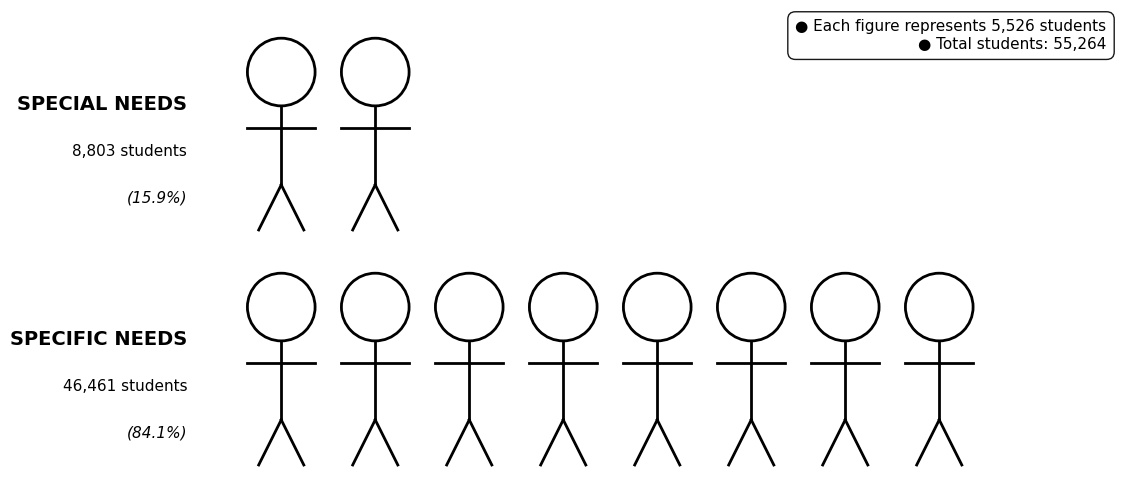

In [170]:
import matplotlib.pyplot as plt
from matplotlib.patches import Circle

def dibujar_persona(ax, x, y, tamaño=1.0, color_body='#1f77b4'):
    """Dibuja una figura humana simple con cabeza negra"""
    scale = tamaño
    
    # Cabeza negra
    cabeza = Circle((x, y + 0.7 * scale), 0.3 * scale, 
                    facecolor='none', edgecolor='black', linewidth=2)
    ax.add_patch(cabeza)
    
    # Cuerpo, brazos y piernas en color_body
    ax.plot([x, x], [y + 0.4 * scale, y - 0.3 * scale], color=color_body, linewidth=2)
    ax.plot([x - 0.3 * scale, x + 0.3 * scale], [y + 0.2 * scale, y + 0.2 * scale], color=color_body, linewidth=2)
    ax.plot([x, x - 0.2 * scale], [y - 0.3 * scale, y - 0.7 * scale], color=color_body, linewidth=2)
    ax.plot([x, x + 0.2 * scale], [y - 0.3 * scale, y - 0.7 * scale], color=color_body, linewidth=2)

def crear_pictogram_simple(datos, titulo, total_iconos=10, iconos_por_fila=10):
    """Pictograma simple solo con dos categorías"""
    fig, ax = plt.subplots(figsize=(12, 5))
    
    total = sum(datos.values())
    categorias = list(datos.keys())
    valores = list(datos.values())
    porcentajes = [(v / total) * 100 for v in valores]
    
    # Colores para el cuerpo de las figuras
    colores = ["black","black"]
    
    # Iconos por categoría
    iconos_por_categoria = [max(1, round((v / total) * total_iconos)) for v in valores]
    
    # Posiciones verticales
    y_positions = [2.5, 0]
    
    for i, (categoria, valor, porcentaje, color, num_iconos) in enumerate(
        zip(categorias, valores, porcentajes, colores, iconos_por_categoria)):
        
        y = y_positions[i]
        # Etiquetas en inglés
        ax.text(-1, y + 0.5, f'{categoria}', ha='right', va='center', fontsize=14, fontweight='bold')
        ax.text(-1, y, f'{valor:,} students', ha='right', va='center', fontsize=11)
        ax.text(-1, y - 0.5, f'({porcentaje:.1f}%)', ha='right', va='center', fontsize=11, style='italic')
        
        # Dibujar iconos
        for j in range(num_iconos):
            x_pos = j * 1.0
            dibujar_persona(ax, x_pos, y, tamaño=1.2, color_body=color)
    
    ax.set_xlim(-2, max(iconos_por_categoria) * 1.0 + 1)
    ax.set_ylim(-1, 4)
    ax.set_aspect('equal')
    ax.axis('off')

    
    # Leyenda arriba a la derecha
    ax.text(0.98, 0.98, 
            f'● Each figure represents {total / total_iconos:,.0f} students\n● Total students: {total:,}',
            transform=ax.transAxes, fontsize=11, va='top', ha='right',
            bbox=dict(boxstyle="round,pad=0.5", facecolor='white', alpha=0.9))
    
    plt.tight_layout()
    return fig

# EJEMPLO DE USO
# Suponiendo que estos son tus datos
df_especials = {'Alumnes matriculats': 8803}
df_especifiques = {'Alumnes matriculats': 46461}

datos_principal = {
    'SPECIAL NEEDS': df_especials['Alumnes matriculats'],
    'SPECIFIC NEEDS': df_especifiques['Alumnes matriculats']
}

fig = crear_pictogram_simple(datos_principal, 'STUDENT DISTRIBUTION BY NEED TYPE', total_iconos=10)
plt.show()


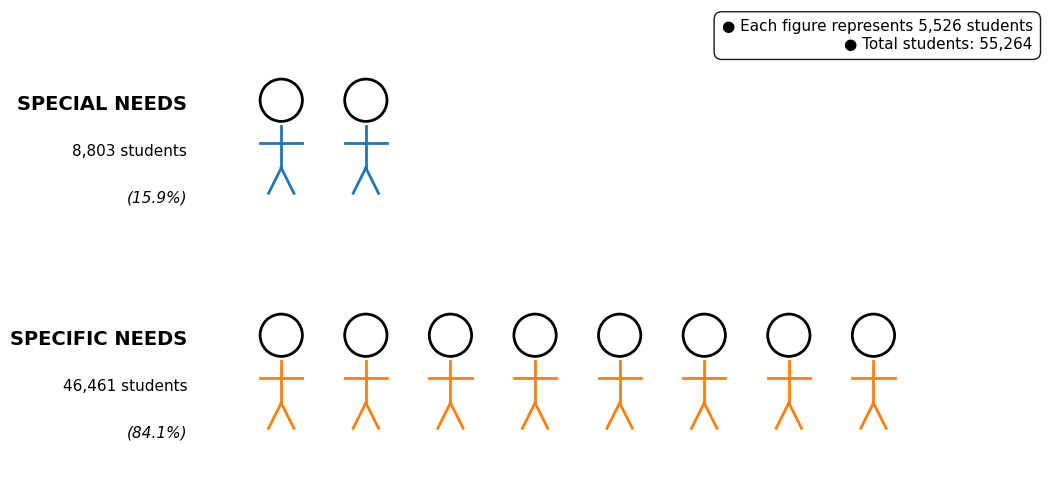

In [174]:
def dibujar_persona(ax, x, y, tamaño=0.9, color_body='#1f77b4'):
    """Dibuja una figura humana simple con cabeza negra, proporciones más compactas"""
    scale = tamaño
    
    # Cabeza negra
    cabeza = Circle((x, y + 0.6 * scale), 0.25 * scale, 
                    facecolor='none', edgecolor='black', linewidth=2)
    ax.add_patch(cabeza)
    
    # Cuerpo, brazos y piernas en color_body (proporciones más cortas)
    ax.plot([x, x], [y + 0.3 * scale, y - 0.2 * scale], color=color_body, linewidth=2)
    ax.plot([x - 0.25 * scale, x + 0.25 * scale], [y + 0.1 * scale, y + 0.1 * scale], color=color_body, linewidth=2)
    ax.plot([x, x - 0.15 * scale], [y - 0.2 * scale, y - 0.5 * scale], color=color_body, linewidth=2)
    ax.plot([x, x + 0.15 * scale], [y - 0.2 * scale, y - 0.5 * scale], color=color_body, linewidth=2)

def crear_pictogram_simple(datos, titulo, total_iconos=10):
    fig, ax = plt.subplots(figsize=(12, 5))
    
    total = sum(datos.values())
    categorias = list(datos.keys())
    valores = list(datos.values())
    porcentajes = [(v / total) * 100 for v in valores]
    
    colores = ["#1f77b4", "#ff7f0e"]  # azul y naranja
    
    iconos_por_categoria = [max(1, round((v / total) * total_iconos)) for v in valores]
    y_positions = [2.5, 0]
    
    for i, (categoria, valor, porcentaje, color, num_iconos) in enumerate(
        zip(categorias, valores, porcentajes, colores, iconos_por_categoria)):
        
        y = y_positions[i]
        ax.text(-1, y + 0.5, f'{categoria}', ha='right', va='center', fontsize=14, fontweight='bold')
        ax.text(-1, y, f'{valor:,} students', ha='right', va='center', fontsize=11)
        ax.text(-1, y - 0.5, f'({porcentaje:.1f}%)', ha='right', va='center', fontsize=11, style='italic')
        
        # Dibujar iconos con menor espaciado
        for j in range(num_iconos):
            x_pos = j * 0.9  # menor separación horizontal
            dibujar_persona(ax, x_pos, y, tamaño=0.9, color_body=color)
    
    ax.set_xlim(-2, max(iconos_por_categoria) * 0.9 + 1)
    ax.set_ylim(-1, 4)
    ax.set_aspect('equal')
    ax.axis('off')

    # Leyenda
    ax.text(0.98, 0.98, 
            f'● Each figure represents {total / total_iconos:,.0f} students\n● Total students: {total:,}',
            transform=ax.transAxes, fontsize=11, va='top', ha='right',
            bbox=dict(boxstyle="round,pad=0.5", facecolor='white', alpha=0.9))
    
    plt.tight_layout()
    return fig

# USO
datos_principal = {
    'SPECIAL NEEDS': 8803,
    'SPECIFIC NEEDS': 46461
}

fig = crear_pictogram_simple(datos_principal, 'STUDENT DISTRIBUTION BY NEED TYPE', total_iconos=10)
plt.show()


In [172]:
df_necesities = df_alumnes_necessities[["Naturalesa", "Sexe", "NESE descripció", "Alumnes matriculats"]].copy()
df_necesities

,Naturalesa,Sexe,NESE descripció,Alumnes matriculats
0,PRIVAT,DONA,TRANSTORN GREU DE LA CONDUCTA,4
1,PRIVAT,DONA,TRASTORN MENTAL GREU,8
2,PRIVAT,DONA,TRASTORNS DE L'ESPECTRE AUTISTA,4
3,PRIVAT,DONA,ALTES CAPACITATS,13
4,PRIVAT,DONA,ALUMNAT NOUVINGUT,21
...,...,...,...,...
843,PÚBLIC,HOME,ALTES CAPACITATS,36
844,PÚBLIC,HOME,ALUMNAT NOUVINGUT,361
845,PÚBLIC,HOME,RETARD GREU DE L'APRENENTATGE,131
846,PÚBLIC,HOME,SITUACIONS SOCIOECONÒMIQUES I/O SOCIOCULTURALS...,964


In [175]:
import pandas as pd
df_results = pd.read_csv('data/data_aprobados_colegio_barrio_2022.csv',delimiter =";",encoding='latin1')
print(df_results.columns)

Index(['Curs', 'Estudi', 'Codi àrea territorial', 'Àrea territorial',
       'Codi comarca', 'Comarca', 'Codi municipi', 'Municipi',
       'Codi districte', 'Naturalesa', 'Titularitat', 'Nivell', 'Sexe',
       'Concert', 'Resultat de l'avaluació', 'Alumnes avaluats'],
      dtype='object')


In [176]:
df_results = df_results[df_results["Municipi"]=="BARCELONA"]
df_results = df_results[df_results["Naturalesa"]=="PÚBLIC"]
df_results.head()

,Curs,Estudi,Codi àrea territorial,Àrea territorial,Codi comarca,Comarca,Codi municipi,Municipi,Codi districte,Naturalesa,Titularitat,Nivell,Sexe,Concert,Resultat de l'avaluació,Alumnes avaluats
41,2021/2022,EDUCACIÓ SECUNDÀRIA OBLIGATÒRIA,108,CONSORCI D'EDUCACIÓ DE BARCELONA,13,BARCELONÈS,8019,BARCELONA,801901,PÚBLIC,DEPARTAMENT D'EDUCACIÓ,1,DONA,NaN,PROMOCIONEN AMB PENDENTS,42
42,2021/2022,EDUCACIÓ SECUNDÀRIA OBLIGATÒRIA,108,CONSORCI D'EDUCACIÓ DE BARCELONA,13,BARCELONÈS,8019,BARCELONA,801901,PÚBLIC,DEPARTAMENT D'EDUCACIÓ,1,DONA,NaN,PROMOCIONEN SENSE PENDENTS,101
43,2021/2022,EDUCACIÓ SECUNDÀRIA OBLIGATÒRIA,108,CONSORCI D'EDUCACIÓ DE BARCELONA,13,BARCELONÈS,8019,BARCELONA,801901,PÚBLIC,DEPARTAMENT D'EDUCACIÓ,1,HOME,NaN,NO PROMOCIONEN,4
44,2021/2022,EDUCACIÓ SECUNDÀRIA OBLIGATÒRIA,108,CONSORCI D'EDUCACIÓ DE BARCELONA,13,BARCELONÈS,8019,BARCELONA,801901,PÚBLIC,DEPARTAMENT D'EDUCACIÓ,1,HOME,NaN,PROMOCIONEN AMB PENDENTS,68
45,2021/2022,EDUCACIÓ SECUNDÀRIA OBLIGATÒRIA,108,CONSORCI D'EDUCACIÓ DE BARCELONA,13,BARCELONÈS,8019,BARCELONA,801901,PÚBLIC,DEPARTAMENT D'EDUCACIÓ,1,HOME,NaN,PROMOCIONEN SENSE PENDENTS,95


In [197]:
columnas_utiles = [
    'Codi districte',
    'Naturalesa',
    'Sexe',
    "Resultat de l'avaluació",
    'Alumnes avaluats'
]

df_results = df_results[columnas_utiles].copy()
df_results

,Codi districte,Naturalesa,Sexe,Resultat de l'avaluació,Alumnes avaluats
41,801901,PÚBLIC,DONA,PROMOCIONEN AMB PENDENTS,42
42,801901,PÚBLIC,DONA,PROMOCIONEN SENSE PENDENTS,101
43,801901,PÚBLIC,HOME,NO PROMOCIONEN,4
44,801901,PÚBLIC,HOME,PROMOCIONEN AMB PENDENTS,68
45,801901,PÚBLIC,HOME,PROMOCIONEN SENSE PENDENTS,95
...,...,...,...,...,...
1182,801910,PÚBLIC,DONA,PROMOCIONEN AMB PENDENTS,143
1183,801910,PÚBLIC,DONA,PROMOCIONEN SENSE PENDENTS,350
1184,801910,PÚBLIC,HOME,NO PROMOCIONEN,88
1185,801910,PÚBLIC,HOME,PROMOCIONEN AMB PENDENTS,167


Cambio de codigo de distrito a barrio

In [198]:
import pandas as pd
import geopandas as gpd

# 1) Cargar GeoJSON
gdf_barrios = gpd.read_file("barcelona_barris_clean.geojson")

# 2) Normalizar nombres
gdf_barrios.columns = gdf_barrios.columns.str.lower().str.replace(" ", "_")

# 3) Seleccionar solo columnas que necesitamos
# NOTA: usamos "nom_districte" para el nombre del distrito
df_barrios = gdf_barrios[["codi_districte", "nom_districte"]].drop_duplicates()

# 4) Extraer último dígito del código de distrito en tu CSV
df_caracteristics["codi_districte_num"] = df_caracteristics["Codi districte"].astype(str).str[-2:].astype(int)

# 5) Hacer merge con el GeoJSON para obtener el nombre del distrito
df_caracter = df_caracteristics.merge(
    df_barrios,
    left_on="codi_districte_num",   # último dígito de tu CSV
    right_on="codi_districte",      # columna del GeoJSON
    how="left"
)

# 6) Opcional: eliminar columnas de códigos
df_caracter = df_caracter.drop(columns=["codi_districte", "codi_districte_num"])

# 7) Renombrar columna si quieres
df_caracter = df_caracter.rename(columns={"nom_districte": "Districte"})

df_caracter

,Naturalesa,Titularitat,Nivell,Codi districte,Matrícula concertada (S/N),Sexe,Edat,Zona nacionalitat (agrupació),Necessitats específiques de suport educatiu,Alumnes matriculats,Districte
0,PÚBLIC,DEPARTAMENT D'EDUCACIÓ,1,801901,NaN,DONA,12,CENTRE I SUDAMÈRICA,NO,4,Ciutat Vella
1,PÚBLIC,DEPARTAMENT D'EDUCACIÓ,1,801901,NaN,DONA,12,CENTRE I SUDAMÈRICA,SI,6,Ciutat Vella
2,PÚBLIC,DEPARTAMENT D'EDUCACIÓ,1,801901,NaN,DONA,12,ESPANYA,NO,41,Ciutat Vella
3,PÚBLIC,DEPARTAMENT D'EDUCACIÓ,1,801901,NaN,DONA,12,ESPANYA,SI,31,Ciutat Vella
4,PÚBLIC,DEPARTAMENT D'EDUCACIÓ,1,801901,NaN,DONA,12,MAGREB,SI,2,Ciutat Vella
...,...,...,...,...,...,...,...,...,...,...,...
1873,PÚBLIC,DEPARTAMENT D'EDUCACIÓ,4,801910,NaN,HOME,17,CENTRE I SUDAMÈRICA,SI,1,Sant Martí
1874,PÚBLIC,DEPARTAMENT D'EDUCACIÓ,4,801910,NaN,HOME,17,ESPANYA,NO,3,Sant Martí
1875,PÚBLIC,DEPARTAMENT D'EDUCACIÓ,4,801910,NaN,HOME,17,ESPANYA,SI,6,Sant Martí
1876,PÚBLIC,DEPARTAMENT D'EDUCACIÓ,4,801910,NaN,HOME,17,MAGREB,NO,1,Sant Martí


In [179]:
df_necesitat = df_caracter.groupby(["Districte", "Codi districte","Sexe","Naturalesa","Necessitats específiques de suport educatiu"]).agg(alumnes=("Alumnes matriculats","sum")).reset_index()

df_necesitat_pivot = df_necesitat.pivot_table(
    index=["Districte", "Codi districte","Naturalesa","Sexe"],  # mantener ambos
    columns="Necessitats específiques de suport educatiu",
    values="alumnes",
    fill_value=0
).reset_index()

In [259]:
df_necesitat_barris = (
    df_necesitat_pivot
    .groupby(["Districte", "Codi districte", "Naturalesa"], as_index=False)
    .agg({
        "SI": "sum",
        "NO": "sum"
    })
)

df_necesitat_barris["Total"] = df_necesitat_barris["SI"] + df_necesitat_barris["NO"]
df_necesitat_barris["prop_NESE"] = df_necesitat_barris["SI"] / df_necesitat_barris["Total"]
df_necesitat_barris

Necessitats específiques de suport educatiu,Districte,Codi districte,Naturalesa,SI,NO,Total,prop_NESE
0,Ciutat Vella,801901,PÚBLIC,588.0,605.0,1193.0,0.492875
1,Eixample,801902,PÚBLIC,526.0,1721.0,2247.0,0.234090
2,Gràcia,801906,PÚBLIC,185.0,623.0,808.0,0.228960
3,Horta-Guinardó,801907,PÚBLIC,572.0,1462.0,2034.0,0.281219
4,Les Corts,801904,PÚBLIC,199.0,1072.0,1271.0,0.156570
5,Nou Barris,801908,PÚBLIC,1393.0,2038.0,3431.0,0.406004
6,Sant Andreu,801909,PÚBLIC,868.0,1822.0,2690.0,0.322677
7,Sant Martí,801910,PÚBLIC,1073.0,3642.0,4715.0,0.227572
8,Sants-Montjuïc,801903,PÚBLIC,746.0,1586.0,2332.0,0.319897
9,Sarrià-Sant Gervasi,801905,PÚBLIC,294.0,1099.0,1393.0,0.211055


In [199]:

df_necesitat_pivot['Total'] = df_necesitat_pivot[['SI', 'NO']].sum(axis=1)
df_necesitat_pivot['prop_NESE'] = df_necesitat_pivot.get('SI',0) / df_necesitat_pivot['Total']
df_necesitat_pivot.reset_index(inplace=True)

df_necesitat_pivot.head()

Necessitats específiques de suport educatiu,level_0,index,Districte,Codi districte,Naturalesa,Sexe,NO,SI,Total,prop_NESE
0,0,0,Ciutat Vella,801901,PÚBLIC,DONA,289.0,273.0,562.0,0.485765
1,1,1,Ciutat Vella,801901,PÚBLIC,HOME,316.0,315.0,631.0,0.499208
2,2,2,Eixample,801902,PÚBLIC,DONA,890.0,231.0,1121.0,0.206066
3,3,3,Eixample,801902,PÚBLIC,HOME,831.0,295.0,1126.0,0.261989
4,4,4,Gràcia,801906,PÚBLIC,DONA,304.0,77.0,381.0,0.202100


In [200]:
total = df_necesitat_pivot["Total"].sum()
nese = df_necesitat_pivot["SI"].sum()
no_nese = df_necesitat_pivot["NO"].sum()
prop_nese = nese/total
prop_nonese = no_nese/total
print(prop_nese,prop_nonese)

0.2913991136836393 0.7086008863163606


In [201]:
# Agrupar results por distrito y resultado
df_resultats = df_results.groupby(['Codi districte',"Resultat de l'avaluació"]).agg(alumnes=('Alumnes avaluats','sum')).reset_index()
totals = df_resultats.groupby("Resultat de l'avaluació")['alumnes'].sum().reset_index()
total_general = df_resultats['alumnes'].sum()
print(total_general)

22280


In [204]:
# Pivot para organizar por Promocionan sense pendients, amb pendients, no promocionan
df_resultats_pivot = df_resultats.pivot(index="Codi districte", columns="Resultat de l'avaluació", values="alumnes").fillna(0)
df_resultats_pivot['total'] = df_resultats_pivot.sum(axis=1)
df_resultats_pivot['prop_prom'] = df_resultats_pivot.get('PROMOCIONEN SENSE PENDENTS',0)/df_resultats_pivot['total']
df_resultats_pivot['prop_no_prom'] = df_resultats_pivot.get('NO PROMOCIONEN',0)/df_resultats_pivot['total']
df_resultats_pivot['prop_pendents'] = df_resultats_pivot.get('PROMOCIONEN AMB PENDENTS',0)/df_resultats_pivot['total']
df_resultats_pivot.reset_index(inplace=True)
df_resultats_pivot

Resultat de l'avaluació,Codi districte,NO PROMOCIONEN,PROMOCIONEN AMB PENDENTS,PROMOCIONEN SENSE PENDENTS,total,prop_prom,prop_no_prom,prop_pendents
0,801901,80,467,783,1330,0.588722,0.060150,0.351128
1,801902,129,604,1652,2385,0.692662,0.054088,0.253249
2,801903,196,912,1256,2364,0.531303,0.082910,0.385787
3,801904,54,350,876,1280,0.684375,0.042188,0.273438
4,801905,48,332,1022,1402,0.728959,0.034237,0.236805
5,801906,30,193,588,811,0.725031,0.036991,0.237978
6,801907,80,684,1272,2036,0.624754,0.039293,0.335953
7,801908,219,1341,1662,3222,0.515829,0.067970,0.416201
8,801909,135,930,1650,2715,0.607735,0.049724,0.342541
9,801910,301,1479,2955,4735,0.624076,0.063569,0.312355


In [205]:
prop_total_results = df_resultats_pivot[["prop_prom", "prop_no_prom", "prop_pendents"]].sum()/10
prop_total_results

Resultat de l'avaluació
prop_prom        0.632345
prop_no_prom     0.053112
prop_pendents    0.314543
dtype: float64

In [256]:
df_necesitat_pivot

Necessitats específiques de suport educatiu,level_0,index,Districte,Codi districte,Naturalesa,Sexe,NO,SI,Total,prop_NESE
0,0,0,Ciutat Vella,801901,PÚBLIC,DONA,289.0,273.0,562.0,0.485765
1,1,1,Ciutat Vella,801901,PÚBLIC,HOME,316.0,315.0,631.0,0.499208
2,2,2,Eixample,801902,PÚBLIC,DONA,890.0,231.0,1121.0,0.206066
3,3,3,Eixample,801902,PÚBLIC,HOME,831.0,295.0,1126.0,0.261989
4,4,4,Gràcia,801906,PÚBLIC,DONA,304.0,77.0,381.0,0.202100
5,5,5,Gràcia,801906,PÚBLIC,HOME,319.0,108.0,427.0,0.252927
6,6,6,Horta-Guinardó,801907,PÚBLIC,DONA,679.0,249.0,928.0,0.268319
7,7,7,Horta-Guinardó,801907,PÚBLIC,HOME,783.0,323.0,1106.0,0.292043
8,8,8,Les Corts,801904,PÚBLIC,DONA,517.0,91.0,608.0,0.149671
9,9,9,Les Corts,801904,PÚBLIC,HOME,555.0,108.0,663.0,0.162896


## Correlación proporcion necesidades (prop_NESE) y proporcion aprobados 

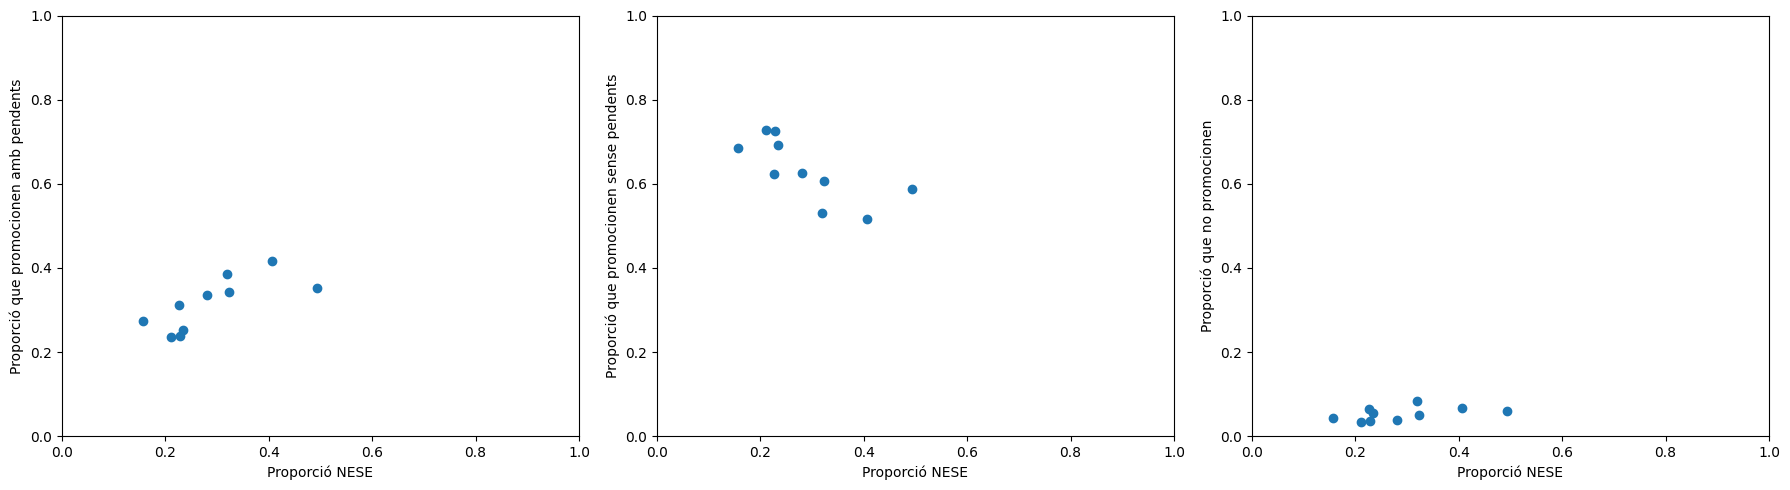

In [260]:
import matplotlib.pyplot as plt

merged = df_resultats_pivot.merge(df_necesitat_barris, on="Codi districte")

# Crear figura con 1 fila y 3 columnas
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

x_min, x_max = 0, 1
y_min, y_max = 0, 1

# --- Gráfico 1 ---
axs[0].scatter(merged['prop_NESE'], merged['prop_pendents'])
axs[0].set_xlabel("Proporció NESE")
axs[0].set_xlim(x_min, x_max)
axs[0].set_ylim(y_min, y_max)
axs[0].set_ylabel("Proporció que promocionen amb pendents")


# --- Gráfico 2 (mismo tipo, puedes cambiar variables si quieres) ---
axs[1].scatter(merged['prop_NESE'], merged['prop_prom'])
axs[1].set_xlabel("Proporció NESE")
axs[1].set_xlim(x_min, x_max)
axs[1].set_ylim(y_min, y_max)
axs[1].set_ylabel("Proporció que promocionen sense pendents")


# --- Gráfico 3 ---
axs[2].scatter(merged['prop_NESE'], merged['prop_no_prom'])
axs[2].set_xlabel("Proporció NESE")
axs[2].set_xlim(x_min, x_max)
axs[2].set_ylim(y_min, y_max)
axs[2].set_ylabel("Proporció que no promocionen")


plt.tight_layout()
plt.show()


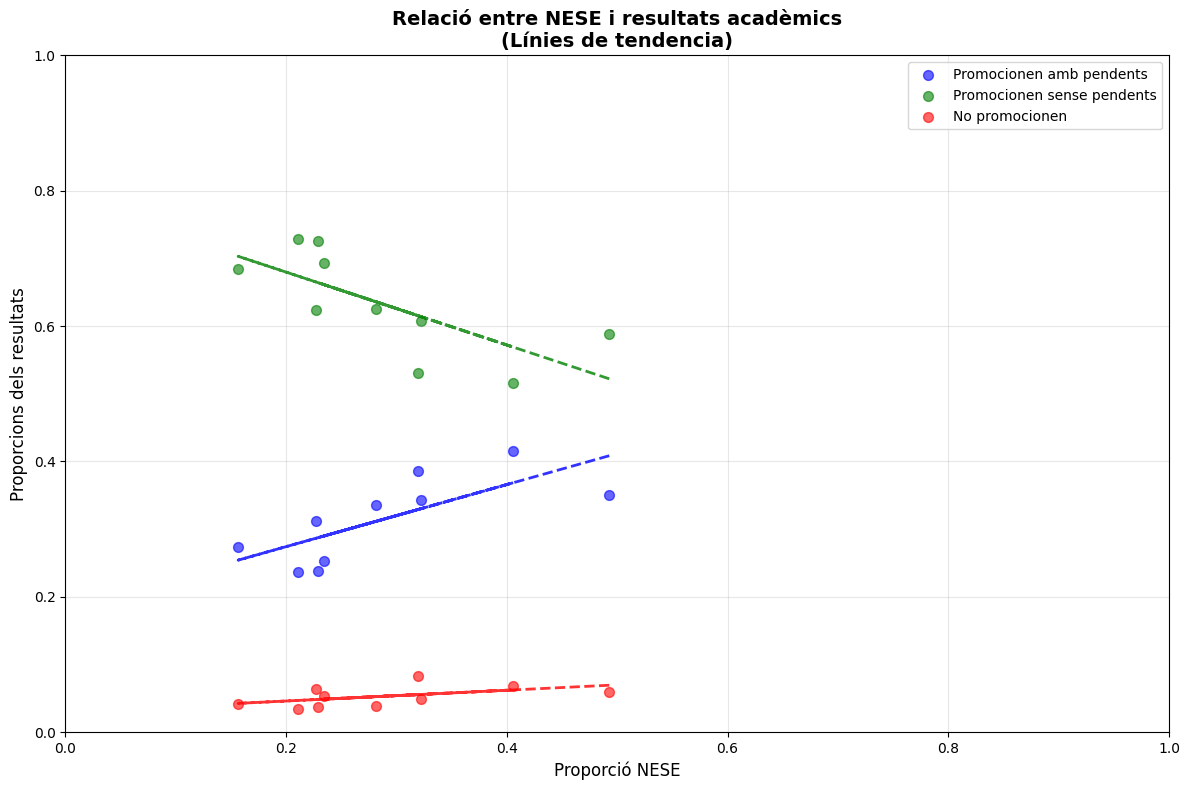

In [262]:
plt.figure(figsize=(12, 8))

# Definir colores y marcadores
colors = ['blue', 'green', 'red']
labels = ['Promocionen amb pendents', 'Promocionen sense pendents', 'No promocionen']
variables = ['prop_pendents', 'prop_prom', 'prop_no_prom']

for i, var in enumerate(variables):
    # Scatter plot
    plt.scatter(merged['prop_NESE'], merged[var], 
               alpha=0.6, color=colors[i], label=labels[i], s=50)
    
    # Línea de tendencia
    z = np.polyfit(merged['prop_NESE'], merged[var], 1)
    p = np.poly1d(z)
    plt.plot(merged['prop_NESE'], p(merged['prop_NESE']), 
            color=colors[i], linestyle='--', alpha=0.8, linewidth=2)

plt.xlabel("Proporció NESE", fontsize=12)
plt.ylabel("Proporcions dels resultats", fontsize=12)
plt.title("Relació entre NESE i resultats acadèmics\n(Línies de tendencia)", 
          fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

In [263]:
plt.figure(figsize=(12, 8))

colors = ['#1f77b4', '#2ca02c', '#d62728']
labels = ['Amb pendents', 'Sense pendents', 'No promocionen']
variables = ['prop_pendents', 'prop_prom', 'prop_no_prom']

# Calcular correlaciones
correlaciones = []
for var in variables:
    corr = merged['prop_NESE'].corr(merged[var])
    correlaciones.append(corr)

for i, (var, corr) in enumerate(zip(variables, correlaciones)):
    plt.scatter(merged['prop_NESE'], merged[var], 
               alpha=0.7, color=colors[i], s=60,
               label=f'{labels[i]} (r = {corr:.3f})')

plt.xlabel("Proporció NESE", fontsize=12)
plt.ylabel("Proporcions dels resultats", fontsize=12)
plt.title("Correlació entre Nivell Socioeconòmic i Resultats Acadèmics", 
          fontsize=14, fontweight='bold')
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.xlim(0, 1)+
plt.ylim(0, 1)

# Añadir texto informativo
plt.text(0.02, 0.98, f'N = {len(merged)} districtes', 
         transform=plt.gca().transAxes, fontsize=10, 
         bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8))

plt.tight_layout()
plt.show()

# Mostrar correlaciones en consola
print("\n=== CORRELACIONES CON NESE ===")
for label, corr in zip(labels, correlaciones):
    print(f"{label}: {corr:.3f}")

SyntaxError: invalid syntax (1367064961.py, line 24)

In [264]:
# Tu código original:
correlaciones = merged[['prop_NESE','prop_prom','prop_no_prom','prop_pendents']].corr()['prop_NESE'].drop('prop_NESE')

# Ver qué contiene
print("Contenido de correlaciones:")
print(correlaciones)
print("\nTipo:", type(correlaciones))
print("Valores:", correlaciones.values)
print("Índices:", correlaciones.index.tolist())


Contenido de correlaciones:
prop_prom       -0.722926
prop_no_prom     0.512443
prop_pendents    0.737686
Name: prop_NESE, dtype: float64

Tipo: <class 'pandas.core.series.Series'>
Valores: [-0.72292577  0.51244257  0.73768628]
Índices: ['prop_prom', 'prop_no_prom', 'prop_pendents']


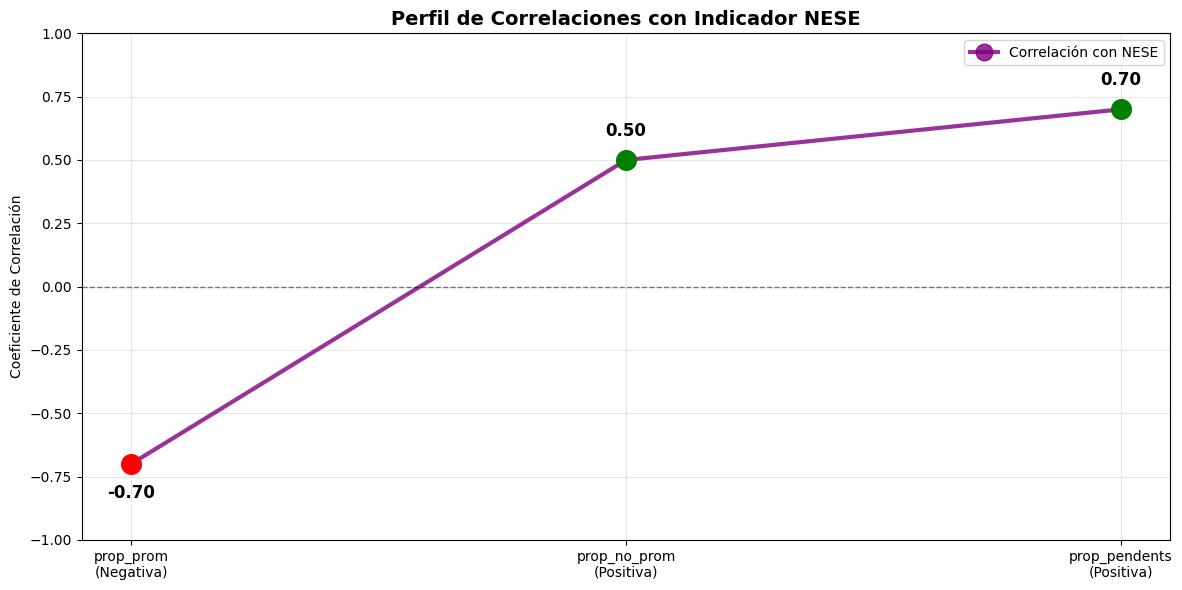

In [265]:
# Gráfico de coordenadas paralelas (ideal para correlaciones con signos mixtos)
fig, ax = plt.subplots(figsize=(12, 6))

# Ejes paralelos
y_positions = [0, 1, 2]  # Posiciones de las características

# Línea que conecta los puntos
ax.plot(y_positions, valores, 'o-', linewidth=3, markersize=12, 
        color='purple', alpha=0.8, label='Correlación con NESE')

# Línea de referencia en cero
ax.axhline(y=0, color='black', linestyle='--', alpha=0.5, linewidth=1)

# Puntos coloreados según signo
for i, (y, valor) in enumerate(zip(y_positions, valores)):
    color = 'red' if valor < 0 else 'green'
    ax.scatter(y, valor, color=color, s=200, zorder=5)
    ax.text(y, valor + 0.08 * np.sign(valor), f'{valor:.2f}', 
            ha='center', va='bottom' if valor > 0 else 'top', 
            fontweight='bold', fontsize=12)

# Configuración
ax.set_xticks(y_positions)
ax.set_xticklabels([f'{f}\n({"Negativa" if v < 0 else "Positiva"})' 
                   for f, v in zip(features, valores)])
ax.set_ylabel('Coeficiente de Correlación')
ax.set_ylim(-1, 1)
ax.grid(True, alpha=0.3)
ax.legend()

plt.title('Perfil de Correlaciones con Indicador NESE', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

Distritos con más alumnos con necesidades educativas tienen más alumnos que no promocionan y mas alumnos que promocionan con pendientes y menos que promocionan sin pendientes  (+-1, altas correlaciones) 

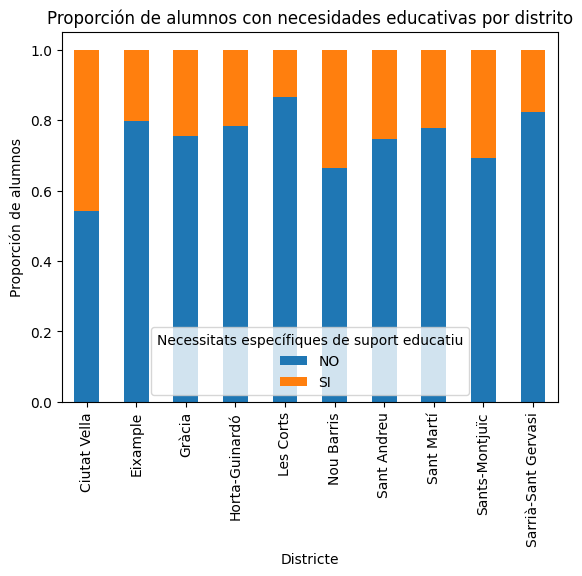

In [ ]:
# Agrupar y pivotar
df_necesitats_distrito = (
    df_caracter.groupby(["Districte", "Necessitats específiques de suport educatiu"])["Alumnes matriculats"]
    .sum()
    .unstack()
)

# Normalizar por distrito (filas) para que cada fila sume 1
df_necesitats_distrito_norm = df_necesitats_distrito.div(df_necesitats_distrito.sum(axis=1), axis=0)

# Graficar
df_necesitats_distrito_norm.plot(kind="bar", stacked=True)
plt.title("Proporción de alumnos con necesidades educativas por distrito")
plt.ylabel("Proporción de alumnos")
plt.show()



In [73]:
df_necesitats_distrito_norm

Necessitats específiques de suport educatiu,NO,SI
Districte,,
Ciutat Vella,0.542923,0.457077
Eixample,0.798097,0.201903
Gràcia,0.754644,0.245356
Horta-Guinardó,0.784451,0.215549
Les Corts,0.867218,0.132782
Nou Barris,0.664454,0.335546
Sant Andreu,0.745738,0.254262
Sant Martí,0.777792,0.222208
Sants-Montjuïc,0.691414,0.308586


## MAPA CANTIDAD DE EXTRANJEROS

In [79]:
df_barris_nac = (
    df_caracter.groupby(["Districte", "Zona nacionalitat (agrupació)","Necessitats específiques de suport educatiu"])["Alumnes matriculats"]
    .sum()
    .reset_index()
)

df_barris_nac.head()

,Districte,Zona nacionalitat (agrupació),Necessitats específiques de suport educatiu,Alumnes matriculats
0,Ciutat Vella,AMÈRICA DEL NORD,NO,4
1,Ciutat Vella,AMÈRICA DEL NORD,SI,5
2,Ciutat Vella,CENTRE I SUDAMÈRICA,NO,35
3,Ciutat Vella,CENTRE I SUDAMÈRICA,SI,96
4,Ciutat Vella,ESPANYA,NO,835


In [80]:
df = df_barris_nac.copy()

# Crear columna de nacionalidad (local extranjero)
df["Nacionality"] = df["Zona nacionalitat (agrupació)"].apply(lambda x: "Local" if x == "ESPANYA" else "Foreign")

# Agrupar por distrito y nacionalidad
df_grouped = df.groupby(["Districte", "Nacionality"])["Alumnes matriculats"].sum().unstack(fill_value=0).reset_index()

df_grouped 

Nacionality,Districte,Foreign,Local
0,Ciutat Vella,744,1411
1,Eixample,1173,6182
2,Gràcia,384,2738
3,Horta-Guinardó,775,5386
4,Les Corts,463,4372
5,Nou Barris,1248,4477
6,Sant Andreu,766,4807
7,Sant Martí,1198,6421
8,Sants-Montjuïc,959,3432
9,Sarrià-Sant Gervasi,720,9343


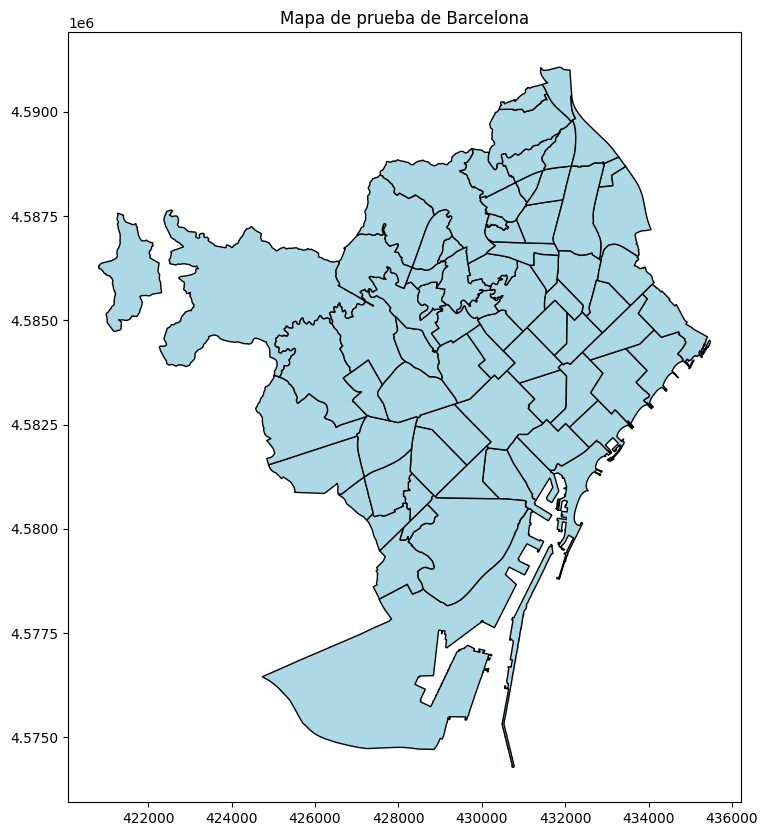

In [81]:
import geopandas as gpd
from shapely import wkt
import matplotlib.pyplot as plt

# 1️⃣ Cargar GeoJSON
gdf_barris = gpd.read_file("barcelona_barris_clean.geojson")

# 2️⃣ Convertir la columna WKT a geometría
if isinstance(gdf_barris["geometria_etrs89"].iloc[0], str):
    gdf_barris["geometry"] = gdf_barris["geometria_etrs89"].apply(wkt.loads)

# 3️⃣ Indicarle a GeoPandas que esta columna es la geometría oficial
gdf_barris = gdf_barris.set_geometry("geometry")

# 4️⃣ Mantener solo geometrías válidas
gdf_barris = gdf_barris[gdf_barris["geometry"].notna()]
gdf_barris = gdf_barris[gdf_barris["geometry"].apply(lambda x: x.is_valid)]

# 5️⃣ Asignar CRS (si no lo tiene ya)
if gdf_barris.crs is None:
    gdf_barris = gdf_barris.set_crs(epsg=25831)  # ETRS89 / UTM 31N

fig, ax = plt.subplots(figsize=(10,10))

gdf_barris.plot(
    edgecolor="black",
    color="lightblue",
    ax=ax,
    aspect="equal"   # <<< evita el cálculo erróneo ANTES de plotear
)

plt.title("Mapa de prueba de Barcelona")
plt.show()




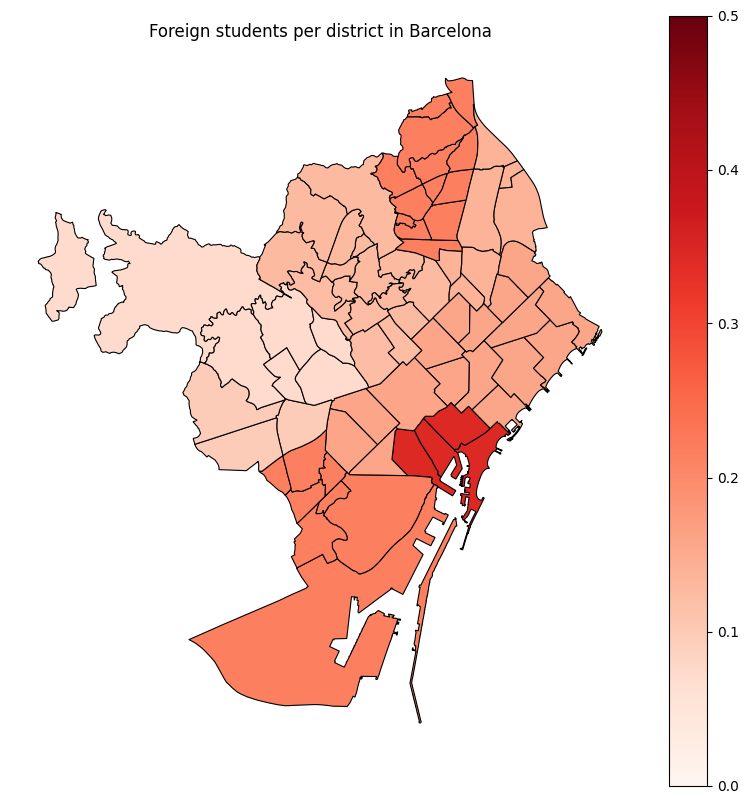

In [ ]:
gdf_merged_foreign = gdf_barris.merge(df_grouped,left_on="nom_districte",right_on="Districte",how="left")

gdf_merged_foreign["Foreign"] = gdf_merged_foreign["Foreign"].fillna(0)
gdf_merged_foreign["Local"] = gdf_merged_foreign["Local"].fillna(0)

# Normalize
gdf_merged_foreign["Prop_Foreign"] = gdf_merged_foreign["Foreign"] / (gdf_merged_foreign["Foreign"] + gdf_merged_foreign["Local"])

fig, ax = plt.subplots(figsize=(10,10))

gdf_merged_foreign.plot(
    column="Prop_Foreign",
    cmap="Reds",
    linewidth=0.8,
    edgecolor="black",
    legend=True,
    ax=ax,
    aspect="equal",
    vmin=0,    # valor mínimo de la escala
    vmax=0.5   # valor máximo de la escala
)
plt.title("Foreign students per district in Barcelona")
plt.axis("off")
plt.savefig("figures_julia/mapas/foreign_students_bcn.png", dpi=300, bbox_inches='tight')
plt.show()

In [96]:
print(gdf_merged_foreign[["Districte", "Local", "Foreign", "Prop_Foreign"]])


       Districte  Local  Foreign  Prop_Foreign
0   Ciutat Vella   1411      744      0.345244
1   Ciutat Vella   1411      744      0.345244
2   Ciutat Vella   1411      744      0.345244
3   Ciutat Vella   1411      744      0.345244
4       Eixample   6182     1173      0.159483
..           ...    ...      ...           ...
68    Sant Martí   6421     1198      0.157238
69    Sant Martí   6421     1198      0.157238
70    Sant Martí   6421     1198      0.157238
71    Sant Martí   6421     1198      0.157238
72    Sant Martí   6421     1198      0.157238

[73 rows x 4 columns]


## MAPA ALUMNONS CON NECESIDADES ESPECÍFICAS/ESPECIALES

In [84]:
df_necesitat_pivot

Necessitats específiques de suport educatiu,index,Districte,Codi districte,NO,SI,Total,prop_NESE
0,0,Ciutat Vella,801901,1170.0,985.0,2155.0,0.457077
1,1,Eixample,801902,5870.0,1485.0,7355.0,0.201903
2,2,Gràcia,801906,2356.0,766.0,3122.0,0.245356
3,3,Horta-Guinardó,801907,4833.0,1328.0,6161.0,0.215549
4,4,Les Corts,801904,4193.0,642.0,4835.0,0.132782
5,5,Nou Barris,801908,3804.0,1921.0,5725.0,0.335546
6,6,Sant Andreu,801909,4156.0,1417.0,5573.0,0.254262
7,7,Sant Martí,801910,5926.0,1693.0,7619.0,0.222208
8,8,Sants-Montjuïc,801903,3036.0,1355.0,4391.0,0.308586
9,9,Sarrià-Sant Gervasi,801905,8272.0,1791.0,10063.0,0.177979


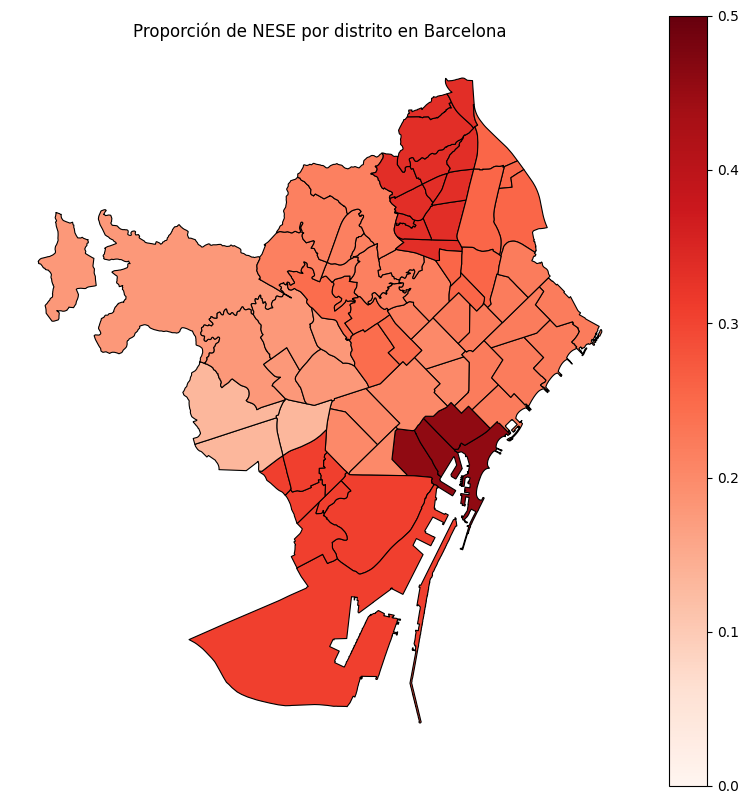

In [ ]:
import geopandas as gpd
from shapely import wkt
import matplotlib.pyplot as plt

# 1️⃣ Cargar GeoJSON
gdf_barris = gpd.read_file("barcelona_barris_clean.geojson")

# 2️⃣ Convertir la columna WKT a geometría
if isinstance(gdf_barris["geometria_etrs89"].iloc[0], str):
    gdf_barris["geometry"] = gdf_barris["geometria_etrs89"].apply(wkt.loads)

# 3️⃣ Indicarle a GeoPandas que esta columna es la geometría oficial
gdf_barris = gdf_barris.set_geometry("geometry")

# 4️⃣ Mantener solo geometrías válidas
gdf_barris = gdf_barris[gdf_barris["geometry"].notna()]
gdf_barris = gdf_barris[gdf_barris["geometry"].apply(lambda x: x.is_valid)]

# 5️⃣ Asignar CRS (si no lo tiene ya)
if gdf_barris.crs is None:
    gdf_barris = gdf_barris.set_crs(epsg=25831)  # ETRS89 / UTM 31N

# 6️⃣ Hacer merge con tu df que contiene prop_NESE
gdf_merged_nese = gdf_barris.merge(df_necesitat_pivot, left_on="nom_districte", right_on="Districte", how="left")

# 7️⃣ Rellenar NaNs si es necesario
gdf_merged_nese["prop_NESE"] = gdf_merged_nese["prop_NESE"].fillna(0)

fig, ax = plt.subplots(figsize=(10,10))

gdf_merged_nese.plot(
    column="prop_NESE",
    cmap="Reds",
    linewidth=0.8,
    edgecolor="black",
    legend=True,
    ax=ax,
    aspect="equal",
    vmin=0,    # valor mínimo de la escala
    vmax=0.5   # valor máximo de la escala
)

plt.title("Proporción de NESE por distrito en Barcelona")
plt.savefig("figures_julia/mapas/prop_NESE_bcn.png", dpi=300, bbox_inches='tight')
plt.axis("off")
plt.show()


# Correlacion alumnos nuevos (extranjeros) / Necesidades ?

In [102]:
# Agrupar por distrito y calcular la media de la proporción
df_foreign_districte = gdf_merged_foreign.groupby('Districte', as_index=False)['Prop_Foreign'].mean()
df_nese_districte = gdf_merged_nese.groupby('Districte', as_index=False)['prop_NESE'].mean()

# Hacer merge para compararlos
df_compare = df_nese_districte.merge(df_foreign_districte, on='Districte', how='inner')

print(df_compare)


             Districte  prop_NESE  Prop_Foreign
0         Ciutat Vella   0.457077      0.345244
1             Eixample   0.201903      0.159483
2               Gràcia   0.245356      0.122998
3       Horta-Guinardó   0.215549      0.125791
4            Les Corts   0.132782      0.095760
5           Nou Barris   0.335546      0.217991
6          Sant Andreu   0.254262      0.137448
7           Sant Martí   0.222208      0.157238
8       Sants-Montjuïc   0.308586      0.218401
9  Sarrià-Sant Gervasi   0.177979      0.071549


In [105]:
corr = df_compare[['prop_NESE', 'Prop_Foreign']].corr()
print(corr)


              prop_NESE  Prop_Foreign
prop_NESE      1.000000      0.943971
Prop_Foreign   0.943971      1.000000


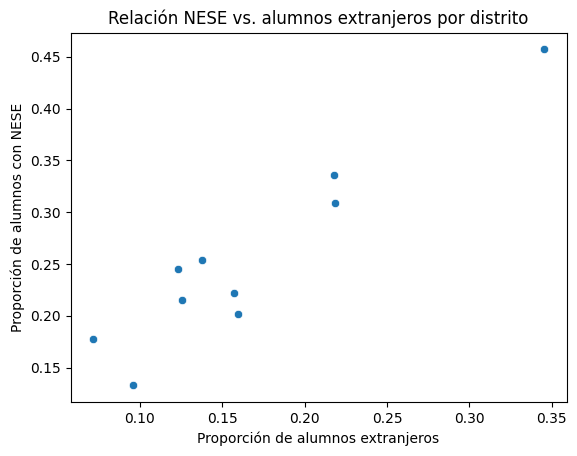

In [104]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(data=df_compare, x='Prop_Foreign', y='prop_NESE')
plt.xlabel("Proporción de alumnos extranjeros")
plt.ylabel("Proporción de alumnos con NESE")
plt.title("Relación NESE vs. alumnos extranjeros por distrito")
plt.show()


Existe correlacion, muchas de las necesidades son que son nuevos entonces probablemente sean extranjeros

Obtengo del df_especifiques por distrito - NO PUEDO - ABORTAMOS MISIÓN 
 - Estudiar % extranjeros,% NESE (sin tipo concreto) y ver si ay mas extranjeros con eso( no me convence) - he podido 
 - Mirarlo en cataluña en general

## Privado/Público y NESE

In [107]:
df_caracter

,Naturalesa,Titularitat,Nivell,Codi districte,Matrícula concertada (S/N),Sexe,Edat,Zona nacionalitat (agrupació),Necessitats específiques de suport educatiu,Alumnes matriculats,Districte
0,PRIVAT,ASSOCIACIONS,1,801901,SI,HOME,12,CENTRE I SUDAMÈRICA,SI,1,Ciutat Vella
1,PRIVAT,ASSOCIACIONS,1,801901,SI,HOME,12,ESPANYA,NO,1,Ciutat Vella
2,PRIVAT,ASSOCIACIONS,1,801901,SI,HOME,12,ESPANYA,SI,1,Ciutat Vella
3,PRIVAT,ASSOCIACIONS,1,801901,SI,HOME,12,MAGREB,SI,1,Ciutat Vella
4,PRIVAT,ASSOCIACIONS,1,801901,SI,HOME,12,ÀSIA I OCEANIA,SI,1,Ciutat Vella
...,...,...,...,...,...,...,...,...,...,...,...
5250,PÚBLIC,DEPARTAMENT D'EDUCACIÓ,4,801910,NaN,HOME,17,CENTRE I SUDAMÈRICA,SI,1,Sant Martí
5251,PÚBLIC,DEPARTAMENT D'EDUCACIÓ,4,801910,NaN,HOME,17,ESPANYA,NO,3,Sant Martí
5252,PÚBLIC,DEPARTAMENT D'EDUCACIÓ,4,801910,NaN,HOME,17,ESPANYA,SI,6,Sant Martí
5253,PÚBLIC,DEPARTAMENT D'EDUCACIÓ,4,801910,NaN,HOME,17,MAGREB,NO,1,Sant Martí


In [122]:
df_necesitat.head()

,Districte,Codi districte,Naturalesa,Necessitats específiques de suport educatiu,alumnes
0,Ciutat Vella,801901,PRIVAT,NO,565
1,Ciutat Vella,801901,PRIVAT,SI,397
2,Ciutat Vella,801901,PÚBLIC,NO,605
3,Ciutat Vella,801901,PÚBLIC,SI,588
4,Eixample,801902,PRIVAT,NO,4149


In [140]:
df_summary = df_necesitat.groupby(
    ['Naturalesa', 'Necessitats específiques de suport educatiu',"Sexe"]
)['alumnes'].sum().reset_index()
df_summary.head()

,Naturalesa,Necessitats específiques de suport educatiu,Sexe,alumnes
0,PRIVAT,NO,DONA,14207
1,PRIVAT,NO,HOME,13739
2,PRIVAT,SI,DONA,2919
3,PRIVAT,SI,HOME,4020
4,PÚBLIC,NO,DONA,7741


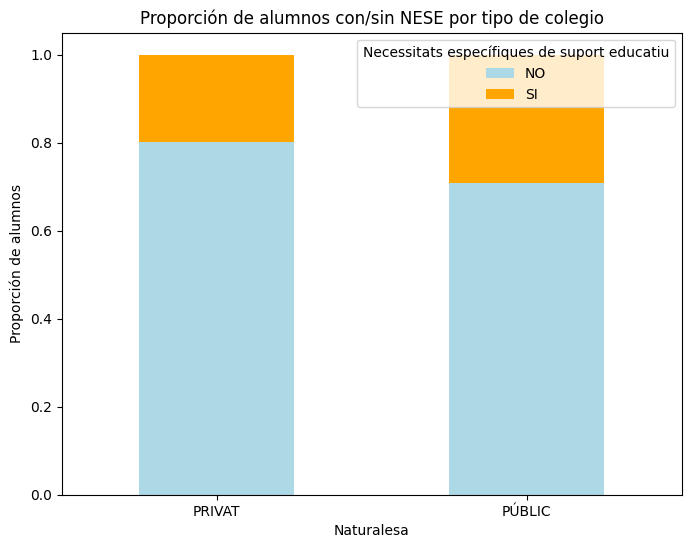

In [135]:
df_pivot_norm = df_pivot.div(df_pivot.sum(axis=1), axis=0)
df_pivot_norm.plot(
    kind='bar',
    stacked=True,
    color=['lightblue', 'orange'],
    figsize=(8,6)
)
plt.ylabel("Proporción de alumnos")
plt.title("Proporción de alumnos con/sin NESE por tipo de colegio")
plt.xticks(rotation=0)
plt.show()



# Genero/ NESE

# Necesidades específicas / clasificacion

C:\Users\PC\AppData\Local\Temp\ipykernel_18784\1790172235.py:13: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




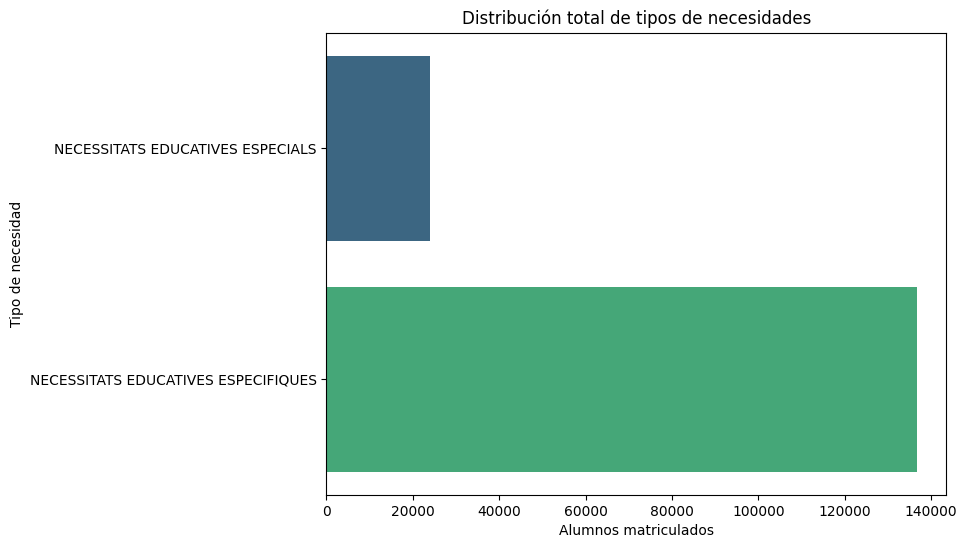

In [150]:
import seaborn as sns

# Combinar todos los df en uno solo para contar categorías
df_todas = pd.concat([
    df_especifiques, df_especials, df_mental, df_educatives, df_intel, df_fisics
])

# Agrupar por categoría
df_necesidades = df_todas.groupby('NESE agrupació')['Alumnes matriculats'].sum().reset_index()

# Plot
plt.figure(figsize=(8,6))
sns.barplot(data=df_necesidades, x='Alumnes matriculats', y='NESE agrupació', palette='viridis')
plt.title('Distribución total de tipos de necesidades')
plt.xlabel('Alumnos matriculados')
plt.ylabel('Tipo de necesidad')
plt.show()


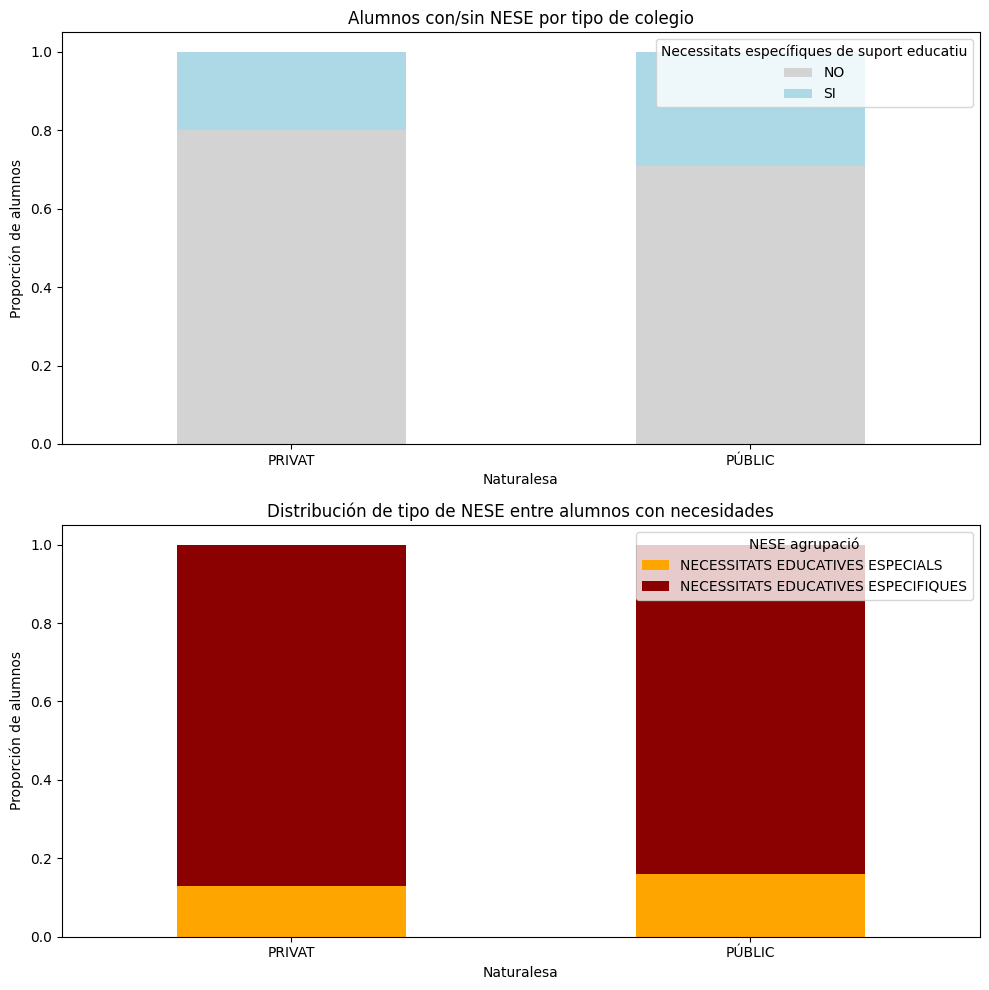

In [155]:
# Contar alumnos por tipo de colegio y tipo de NESE
df_tipo = pd.concat([df_especifiques, df_especials])
df_tipo_summary = df_tipo.groupby(['Naturalesa', 'NESE agrupació'])['Alumnes matriculats'].sum().reset_index()
df_tipo_pivot = df_tipo_summary.pivot_table(
    index='Naturalesa',
    columns='NESE agrupació',  # Específicas / Especials
    values='Alumnes matriculats',
    aggfunc='sum',
    fill_value=0
)
df_tipo_pivot_norm = df_tipo_pivot.div(df_tipo_pivot.sum(axis=1), axis=0)

# Panel con los dos gráficos
fig, axes = plt.subplots(2, 1, figsize=(10,10))

# 1️⃣ Con/sin NESE (df_pivot_nese_general_norm)
df_pivot_nese_general_norm.plot(
    kind='bar',
    stacked=True,
    color=['lightgray', 'lightblue'],
    ax=axes[0]
)
axes[0].set_ylabel("Proporción de alumnos")
axes[0].set_title("Alumnos con/sin NESE por tipo de colegio")
axes[0].set_xticklabels(df_pivot_nese_general_norm.index, rotation=0)

# 2️⃣ Tipo de NESE (df_tipo_pivot_norm)
df_tipo_pivot_norm.plot(
    kind='bar',
    stacked=True,
    color=['orange', 'darkred'],
    ax=axes[1]
)
axes[1].set_ylabel("Proporción de alumnos")
axes[1].set_title("Distribución de tipo de NESE entre alumnos con necesidades")
axes[1].set_xticklabels(df_tipo_pivot_norm.index, rotation=0)

plt.tight_layout()
plt.show()


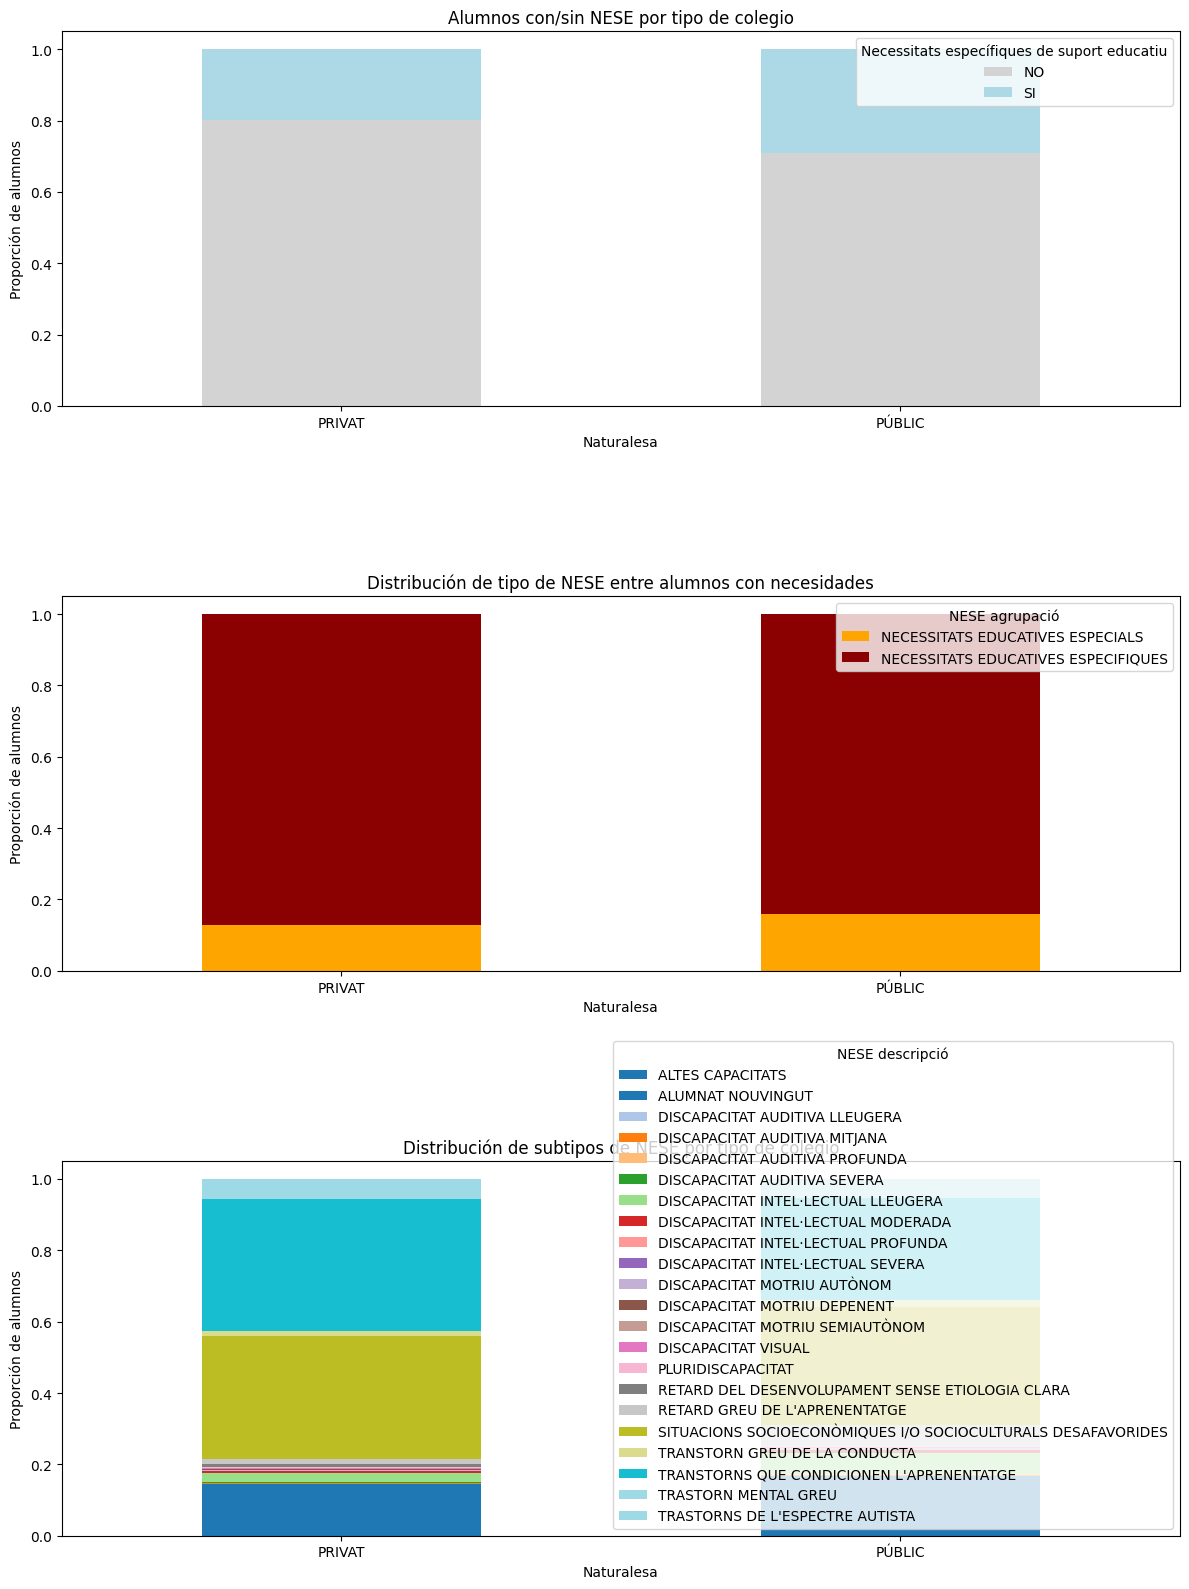

In [156]:
import pandas as pd
import matplotlib.pyplot as plt

# --------------------------
# 1️⃣ Alumnos con/sin NESE
# --------------------------
df_nese_general = df_summary.groupby(['Naturalesa', 'Necessitats específiques de suport educatiu'])['alumnes'].sum().reset_index()
df_pivot_nese_general = df_nese_general.pivot_table(
    index='Naturalesa',
    columns='Necessitats específiques de suport educatiu',
    values='alumnes',
    aggfunc='sum',
    fill_value=0
)
df_pivot_nese_general_norm = df_pivot_nese_general.div(df_pivot_nese_general.sum(axis=1), axis=0)

# --------------------------
# 2️⃣ Distribución entre Específicas y Especials (solo los que tienen NESE)
# --------------------------
df_with_nese = pd.concat([df_especifiques, df_especials])
df_tipo_summary = df_with_nese.groupby(['Naturalesa', 'NESE agrupació'])['Alumnes matriculats'].sum().reset_index()
df_tipo_pivot = df_tipo_summary.pivot_table(
    index='Naturalesa',
    columns='NESE agrupació',
    values='Alumnes matriculats',
    aggfunc='sum',
    fill_value=0
)
df_tipo_pivot_norm = df_tipo_pivot.div(df_tipo_pivot.sum(axis=1), axis=0)

# --------------------------
# 3️⃣ Distribución por subtipos (opcional)
# --------------------------
df_subtipos_summary = df_with_nese.groupby(['Naturalesa', 'NESE descripció'])['Alumnes matriculats'].sum().reset_index()
df_subtipos_pivot = df_subtipos_summary.pivot_table(
    index='Naturalesa',
    columns='NESE descripció',
    values='Alumnes matriculats',
    aggfunc='sum',
    fill_value=0
)
df_subtipos_pivot_norm = df_subtipos_pivot.div(df_subtipos_pivot.sum(axis=1), axis=0)

# --------------------------
# 4️⃣ Crear panel de 3 gráficos
# --------------------------
fig, axes = plt.subplots(3, 1, figsize=(12,16))

# a) Con/sin NESE
df_pivot_nese_general_norm.plot(
    kind='bar',
    stacked=True,
    color=['lightgray', 'lightblue'],
    ax=axes[0]
)
axes[0].set_ylabel("Proporción de alumnos")
axes[0].set_title("Alumnos con/sin NESE por tipo de colegio")
axes[0].set_xticklabels(df_pivot_nese_general_norm.index, rotation=0)

# b) Específicas vs Especials
df_tipo_pivot_norm.plot(
    kind='bar',
    stacked=True,
    color=['orange', 'darkred'],
    ax=axes[1]
)
axes[1].set_ylabel("Proporción de alumnos")
axes[1].set_title("Distribución de tipo de NESE entre alumnos con necesidades")
axes[1].set_xticklabels(df_tipo_pivot_norm.index, rotation=0)

# c) Subtipos
df_subtipos_pivot_norm.plot(
    kind='bar',
    stacked=True,
    ax=axes[2],
    colormap='tab20'
)
axes[2].set_ylabel("Proporción de alumnos")
axes[2].set_title("Distribución de subtipos de NESE por tipo de colegio")
axes[2].set_xticklabels(df_subtipos_pivot_norm.index, rotation=0)

plt.tight_layout()
plt.show()
